In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
# load data
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\jupyrt_files\\hackathon_data\\Train.csv')

In [38]:
df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.00,26.00,10.00,48.00,14.00,47.00,430000.00,1.00,1.00,1.00,1.00,593.20,1244.14,787.00,6885.00,85919.48,25192.00,24.00,6.00,25296.00,11527.50,191777.13,2.00,40.00,24563.00,30051.32,12761.00,2.00,65.00,50836.00,Y,1674.09,20014.00
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.00,7.00,13.00,3.00,21.00,31.00,127500.00,1.00,1.00,1.00,1.00,213557.15,172678.56,90525.00,1500.00,12255.75,88693.37,35.00,36.00,80750.00,92276.57,71162.00,2.00,78.00,23948.00,42119.05,76206.00,21.00,63.00,23226.00,Y,13043.34,10173.00
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.00,32.00,102.00,4.00,1.00,80.00,199999.00,1.00,1.00,1.00,1.00,165907.57,470000.00,25524.00,3735.00,34193.00,84880.00,72.00,9.00,38466.00,19343.00,70978.00,2.00,82.00,10752.00,58373.25,75283.00,7.00,1.00,27036.00,Y,25375.27,16095.00
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.00,1.00,50.00,1.00,1.00,10.00,155000.00,1.00,1.00,1.00,1.00,81872.65,223379.40,48500.00,-4679.00,11558.23,236326.00,43.00,30.00,52732.00,43867.91,63033.84,23.00,38.00,12607.00,69851.51,68708.00,21.00,83.00,43037.00,Y,3544.33,7707.00
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.00,47.00,82.00,54.00,16.00,68.00,297000.00,1.00,1.00,1.00,1.00,568.80,385000.00,183999.00,6916.00,17022.81,58897.03,46.00,36.00,19613.00,153253.71,30286.00,24.00,50.00,25213.00,10071.00,80140.00,8.00,32.00,32044.00,Y,12780.44,96408.00


([<matplotlib.patches.Wedge at 0x1db5866c748>,
 [Text(0.9793589998580743, 0.5008552179991664, '249'),
  Text(0.31478284706985005, 1.0539979882289148, '867'),
  Text(-0.3969686525845204, 1.0258732323563329, '683'),
  Text(-0.9333176983029289, 0.5821667063947603, '355'),
  Text(-1.0968747892626372, -0.08285949963670744, '748'),
  Text(-0.8420844563606876, -0.707738488677651, '743'),
  Text(-0.2843830065933863, -1.062603550512093, '805'),
  Text(0.33114258833865534, -1.0489731103266546, '799'),
  Text(0.809929561275279, -0.7443212382919315, '516'),
  Text(1.0673783700229877, -0.2659011380326725, '536')],
 [Text(0.5341958181044041, 0.2731937552722726, '15.05'),
  Text(0.17169973476537273, 0.574907993579408, '10.67'),
  Text(-0.21652835595519293, 0.5595672176489088, '10.32'),
  Text(-0.5090823808925066, 0.3175454762153238, '10.17'),
  Text(-0.598295339597802, -0.04519609071093132, '9.98'),
  Text(-0.4593187943785568, -0.386039175642355, '9.87'),
  Text(-0.1551180035963925, -0.57960193664295

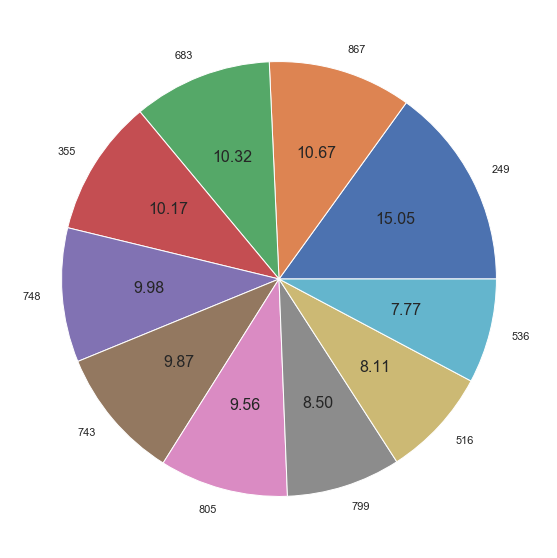

In [39]:
fig= plt.figure(figsize=(10,10))
labels = '249', '867', '683', '355' ,'748','743','805','799','516','536'
plt.rcParams.update({'font.size': 16})
plt.pie(df.region_code.value_counts().head(10),autopct='%.2f',labels=labels)
fig.savefig('region_code.jpg')

In [40]:
df.region_code.value_counts().head(10)

249    395
867    280
683    271
355    267
748    262
743    259
805    251
799    223
516    213
536    204
Name: region_code, dtype: int64

In [41]:
# Describe statistical information of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,15000.00,10032.08,5760.37,1.00,5060.50,10054.00,15015.25,19998.00
age,15000.00,47.79,30.63,25.00,33.00,40.00,53.00,223.00
region_code,15000.00,598.42,220.06,123.00,424.00,623.00,799.00,974.00
cc_cons_apr,15000.00,17957.39,25187.94,253.00,4411.03,10288.10,21405.00,441031.33
dc_cons_apr,15000.00,8171.10,14773.03,19.35,1634.00,3996.90,9339.02,229255.00
cc_cons_may,15000.00,16337.05,27060.85,157.00,3638.00,8695.03,18951.30,1117246.31
dc_cons_may,15000.00,7703.61,18987.30,22.00,1643.50,3820.50,8212.00,911223.49
cc_cons_jun,15000.00,12129.01,18488.78,65.00,3004.50,6655.25,14247.00,382914.10
dc_cons_jun,15000.00,7097.40,13251.70,62.00,1358.75,3327.00,7597.00,233384.00
cc_count_apr,15000.00,41.49,97.43,1.00,5.00,10.00,44.00,531.00


### Corelation

In [42]:
# Corelation of the target with each feature
df.corr()["cc_cons"].sort_values(ascending = False)

cc_cons                  1.00
cc_cons_may              0.02
cc_count_may             0.02
credit_count_may         0.01
investment_2             0.01
max_credit_amount_may    0.01
max_credit_amount_jun    0.01
dc_count_may             0.01
cc_cons_apr              0.01
credit_amount_apr        0.01
credit_count_jun         0.01
ID                       0.00
investment_1             0.00
debit_amount_apr         0.00
dc_cons_jun              0.00
investment_4             0.00
dc_cons_apr             -0.00
debit_count_may         -0.00
debit_amount_may        -0.00
dc_cons_may             -0.00
dc_count_apr            -0.00
cc_cons_jun             -0.00
debit_count_apr         -0.00
cc_count_jun            -0.00
credit_amount_may       -0.00
credit_count_apr        -0.00
card_lim                -0.00
max_credit_amount_apr   -0.00
emi_active              -0.00
debit_count_jun         -0.01
debit_amount_jun        -0.01
dc_count_jun            -0.01
age                     -0.01
cc_count_a

### set ID as Index

In [43]:
df.set_index('ID',inplace = True)

In [44]:
df.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.00,26.00,10.00,48.00,14.00,47.00,430000.00,1.00,1.00,1.00,1.00,593.20,1244.14,787.00,6885.00,85919.48,25192.00,24.00,6.00,25296.00,11527.50,191777.13,2.00,40.00,24563.00,30051.32,12761.00,2.00,65.00,50836.00,Y,1674.09,20014.00
17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.00,7.00,13.00,3.00,21.00,31.00,127500.00,1.00,1.00,1.00,1.00,213557.15,172678.56,90525.00,1500.00,12255.75,88693.37,35.00,36.00,80750.00,92276.57,71162.00,2.00,78.00,23948.00,42119.05,76206.00,21.00,63.00,23226.00,Y,13043.34,10173.00
7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.00,32.00,102.00,4.00,1.00,80.00,199999.00,1.00,1.00,1.00,1.00,165907.57,470000.00,25524.00,3735.00,34193.00,84880.00,72.00,9.00,38466.00,19343.00,70978.00,2.00,82.00,10752.00,58373.25,75283.00,7.00,1.00,27036.00,Y,25375.27,16095.00
1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.00,1.00,50.00,1.00,1.00,10.00,155000.00,1.00,1.00,1.00,1.00,81872.65,223379.40,48500.00,-4679.00,11558.23,236326.00,43.00,30.00,52732.00,43867.91,63033.84,23.00,38.00,12607.00,69851.51,68708.00,21.00,83.00,43037.00,Y,3544.33,7707.00
16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.00,47.00,82.00,54.00,16.00,68.00,297000.00,1.00,1.00,1.00,1.00,568.80,385000.00,183999.00,6916.00,17022.81,58897.03,46.00,36.00,19613.00,153253.71,30286.00,24.00,50.00,25213.00,10071.00,80140.00,8.00,32.00,32044.00,Y,12780.44,96408.00


### Feature to Feature corelation

In [45]:
df.corr()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
age,1.00,0.01,0.01,0.02,-0.00,-0.00,-0.01,0.01,0.00,0.00,0.00,0.01,-0.01,0.01,0.00,nan,nan,nan,nan,0.00,0.01,0.02,0.01,0.01,0.01,0.00,-0.00,0.00,0.01,-0.01,0.00,0.02,0.01,-0.00,-0.01,-0.01,0.00,-0.00,0.00,-0.01
region_code,0.01,1.00,0.01,-0.01,-0.01,0.01,-0.01,0.01,-0.00,0.01,-0.01,-0.02,-0.00,-0.02,-0.00,nan,nan,nan,nan,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.01,0.01,-0.01,0.02,-0.01,0.00,-0.00,0.02,0.00,0.00,0.01,0.00,0.00,-0.02
cc_cons_apr,0.01,0.01,1.00,0.00,0.00,0.00,0.01,-0.00,-0.00,0.01,0.01,0.00,-0.00,0.01,0.01,nan,nan,nan,nan,0.01,-0.00,-0.00,-0.00,-0.00,0.01,0.00,0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.01,-0.01,0.01,-0.00,0.00,0.01
dc_cons_apr,0.02,-0.01,0.00,1.00,0.00,-0.01,0.00,-0.01,0.00,-0.00,0.01,0.01,-0.00,0.01,-0.01,nan,nan,nan,nan,0.00,-0.01,-0.01,0.01,-0.00,0.01,-0.00,-0.01,-0.01,-0.01,0.01,0.00,0.00,0.00,-0.00,-0.01,-0.01,-0.00,-0.02,0.00,-0.00
cc_cons_may,-0.00,-0.01,0.00,0.00,1.00,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,nan,nan,nan,nan,0.00,-0.00,0.01,0.01,0.00,-0.00,0.02,-0.02,0.01,0.00,0.01,-0.00,-0.00,0.01,-0.01,0.01,0.00,-0.01,-0.00,0.00,0.02
dc_cons_may,-0.00,0.01,0.00,-0.01,-0.01,1.00,-0.01,0.00,0.00,0.01,-0.00,-0.02,0.00,-0.00,-0.01,nan,nan,nan,nan,-0.01,0.00,-0.01,0.01,0.00,0.01,-0.02,-0.01,-0.00,0.02,-0.01,-0.00,-0.00,0.02,-0.00,-0.00,-0.01,0.00,0.00,-0.00,-0.00
cc_cons_jun,-0.01,-0.01,0.01,0.00,-0.01,-0.01,1.00,0.00,0.00,0.00,0.01,-0.01,-0.01,0.00,0.00,nan,nan,nan,nan,-0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,0.01,-0.01,-0.01,-0.01,-0.00,0.01,0.01,0.00,0.01,0.00,-0.00,-0.00
dc_cons_jun,0.01,0.01,-0.00,-0.01,-0.00,0.00,0.00,1.00,-0.01,0.00,0.00,0.00,-0.00,0.00,0.00,nan,nan,nan,nan,-0.01,0.01,-0.00,0.01,-0.01,-0.00,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.01,-0.01,-0.01,0.00,0.00
cc_count_apr,0.00,-0.00,-0.00,0.00,-0.01,0.00,0.00,-0.01,1.00,-0.00,0.01,-0.01,-0.01,0.00,-0.00,nan,nan,nan,nan,-0.00,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00,-0.00,-0.01,0.00,-0.00,-0.02,-0.01,-0.01,-0.01
cc_count_may,0.00,0.01,0.01,-0.00,-0.00,0.01,0.00,0.00,-0.00,1.00,-0.00,0.00,-0.00,-0.00,0.01,nan,nan,nan,nan,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.00,0.01,0.01,0.03,0.04,-0.00,-0.00,0.01,-0.00,0.00,-0.01,0.02


In [46]:
# Treat outliers of age column so that none of the age is greater than 75 years,replace age by median of age column
df.loc[df['age']>75,'age'] = df['age'].median()

## sepration of categorical and numerical columns

In [47]:
cat_col = df.select_dtypes(include = 'object')
num_col = df.select_dtypes(include = 'number')

In [48]:
num_col

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,35.00,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.00,26.00,10.00,48.00,14.00,47.00,430000.00,1.00,1.00,1.00,1.00,593.20,1244.14,787.00,6885.00,85919.48,25192.00,24.00,6.00,25296.00,11527.50,191777.13,2.00,40.00,24563.00,30051.32,12761.00,2.00,65.00,50836.00,1674.09,20014.00
17645,35.00,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.00,7.00,13.00,3.00,21.00,31.00,127500.00,1.00,1.00,1.00,1.00,213557.15,172678.56,90525.00,1500.00,12255.75,88693.37,35.00,36.00,80750.00,92276.57,71162.00,2.00,78.00,23948.00,42119.05,76206.00,21.00,63.00,23226.00,13043.34,10173.00
7604,55.00,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.00,32.00,102.00,4.00,1.00,80.00,199999.00,1.00,1.00,1.00,1.00,165907.57,470000.00,25524.00,3735.00,34193.00,84880.00,72.00,9.00,38466.00,19343.00,70978.00,2.00,82.00,10752.00,58373.25,75283.00,7.00,1.00,27036.00,25375.27,16095.00
1590,29.00,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.00,1.00,50.00,1.00,1.00,10.00,155000.00,1.00,1.00,1.00,1.00,81872.65,223379.40,48500.00,-4679.00,11558.23,236326.00,43.00,30.00,52732.00,43867.91,63033.84,23.00,38.00,12607.00,69851.51,68708.00,21.00,83.00,43037.00,3544.33,7707.00
16556,34.00,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.00,47.00,82.00,54.00,16.00,68.00,297000.00,1.00,1.00,1.00,1.00,568.80,385000.00,183999.00,6916.00,17022.81,58897.03,46.00,36.00,19613.00,153253.71,30286.00,24.00,50.00,25213.00,10071.00,80140.00,8.00,32.00,32044.00,12780.44,96408.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,53.00,653,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.00,36.00,3.00,44.00,55.00,29.00,520000.00,1.00,1.00,1.00,1.00,186189.00,24000.00,16215.00,977.00,30608.54,31135.00,79.00,2.00,27608.00,30501.77,23692.00,1.00,8.00,6936.00,487751.19,42625.50,14.00,8.00,82851.00,78966.76,4263.00
10376,44.00,535,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.00,34.00,4.00,7.00,1.00,2.00,472000.00,1.00,1.00,1.00,1.00,24832.00,221000.00,12337.00,-6281.38,39903.00,23797.00,43.00,2.00,30512.00,57918.69,50023.00,4.00,20.00,202639.00,8666.01,34987.55,11.00,18.00,118110.47,4762.10,11019.00
2181,37.00,464,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.00,23.00,61.00,24.00,3.00,3.00,44000.00,1.00,1.00,1.00,1.00,180615.02,253000.00,25000.00,10210.00,29525.63,95477.27,4.00,1.00,41085.00,25404.75,35239.00,43.00,5.00,44421.00,97896.48,261432.00,4.00,73.00,49545.00,2877.33,404227.00


#### Drop 'personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed' as they have std deviation = 0,
#### 'region_code' as it was least corelated to the target and 'investment_4' as it had negative entries  

In [49]:
num_col.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','region_code','investment_4'],axis = 1,inplace = True)

In [50]:
num_col

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,35.00,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.00,26.00,10.00,48.00,14.00,47.00,430000.00,593.20,1244.14,787.00,85919.48,25192.00,24.00,6.00,25296.00,11527.50,191777.13,2.00,40.00,24563.00,30051.32,12761.00,2.00,65.00,50836.00,1674.09,20014.00
17645,35.00,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.00,7.00,13.00,3.00,21.00,31.00,127500.00,213557.15,172678.56,90525.00,12255.75,88693.37,35.00,36.00,80750.00,92276.57,71162.00,2.00,78.00,23948.00,42119.05,76206.00,21.00,63.00,23226.00,13043.34,10173.00
7604,55.00,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.00,32.00,102.00,4.00,1.00,80.00,199999.00,165907.57,470000.00,25524.00,34193.00,84880.00,72.00,9.00,38466.00,19343.00,70978.00,2.00,82.00,10752.00,58373.25,75283.00,7.00,1.00,27036.00,25375.27,16095.00
1590,29.00,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.00,1.00,50.00,1.00,1.00,10.00,155000.00,81872.65,223379.40,48500.00,11558.23,236326.00,43.00,30.00,52732.00,43867.91,63033.84,23.00,38.00,12607.00,69851.51,68708.00,21.00,83.00,43037.00,3544.33,7707.00
16556,34.00,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.00,47.00,82.00,54.00,16.00,68.00,297000.00,568.80,385000.00,183999.00,17022.81,58897.03,46.00,36.00,19613.00,153253.71,30286.00,24.00,50.00,25213.00,10071.00,80140.00,8.00,32.00,32044.00,12780.44,96408.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,53.00,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.00,36.00,3.00,44.00,55.00,29.00,520000.00,186189.00,24000.00,16215.00,30608.54,31135.00,79.00,2.00,27608.00,30501.77,23692.00,1.00,8.00,6936.00,487751.19,42625.50,14.00,8.00,82851.00,78966.76,4263.00
10376,44.00,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.00,34.00,4.00,7.00,1.00,2.00,472000.00,24832.00,221000.00,12337.00,39903.00,23797.00,43.00,2.00,30512.00,57918.69,50023.00,4.00,20.00,202639.00,8666.01,34987.55,11.00,18.00,118110.47,4762.10,11019.00
2181,37.00,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.00,23.00,61.00,24.00,3.00,3.00,44000.00,180615.02,253000.00,25000.00,29525.63,95477.27,4.00,1.00,41085.00,25404.75,35239.00,43.00,5.00,44421.00,97896.48,261432.00,4.00,73.00,49545.00,2877.33,404227.00


### plot histogram of all numerical columns to check skewness

age


Text(0.5, 1.0, 'plotting distributionage')

Text(0.5, 0, 'age')

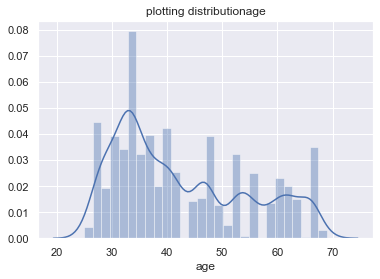

cc_cons_apr


Text(0.5, 1.0, 'plotting distributioncc_cons_apr')

Text(0.5, 0, 'cc_cons_apr')

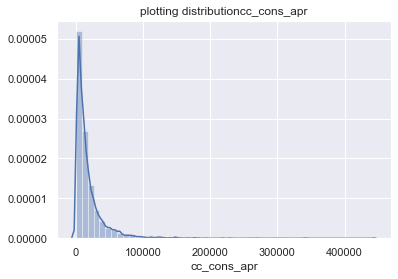

dc_cons_apr


Text(0.5, 1.0, 'plotting distributiondc_cons_apr')

Text(0.5, 0, 'dc_cons_apr')

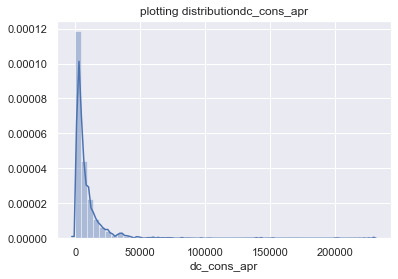

cc_cons_may


Text(0.5, 1.0, 'plotting distributioncc_cons_may')

Text(0.5, 0, 'cc_cons_may')

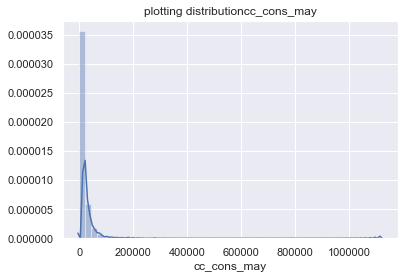

dc_cons_may


Text(0.5, 1.0, 'plotting distributiondc_cons_may')

Text(0.5, 0, 'dc_cons_may')

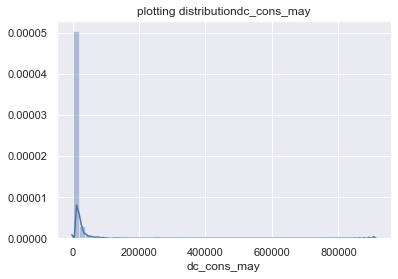

cc_cons_jun


Text(0.5, 1.0, 'plotting distributioncc_cons_jun')

Text(0.5, 0, 'cc_cons_jun')

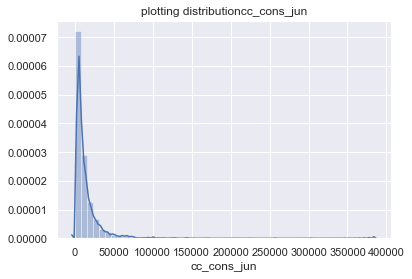

dc_cons_jun


Text(0.5, 1.0, 'plotting distributiondc_cons_jun')

Text(0.5, 0, 'dc_cons_jun')

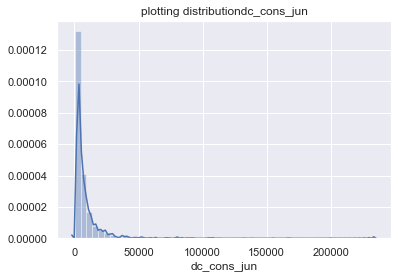

cc_count_apr


Text(0.5, 1.0, 'plotting distributioncc_count_apr')

Text(0.5, 0, 'cc_count_apr')

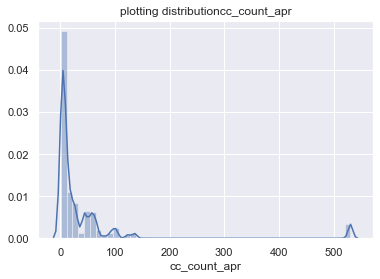

cc_count_may


Text(0.5, 1.0, 'plotting distributioncc_count_may')

Text(0.5, 0, 'cc_count_may')

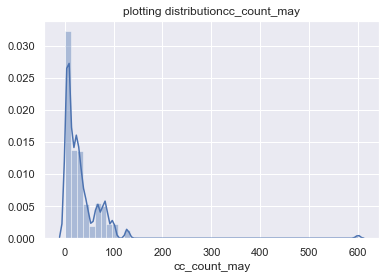

cc_count_jun


Text(0.5, 1.0, 'plotting distributioncc_count_jun')

Text(0.5, 0, 'cc_count_jun')

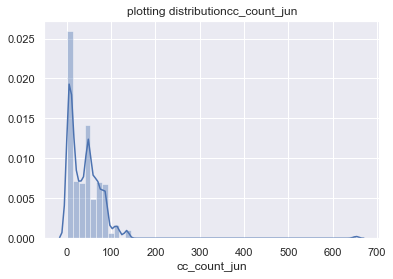

dc_count_apr


Text(0.5, 1.0, 'plotting distributiondc_count_apr')

Text(0.5, 0, 'dc_count_apr')

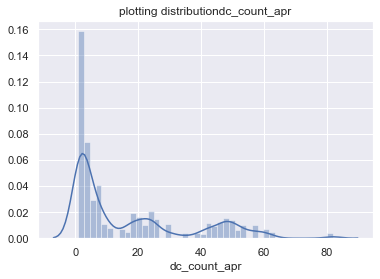

dc_count_may


Text(0.5, 1.0, 'plotting distributiondc_count_may')

Text(0.5, 0, 'dc_count_may')

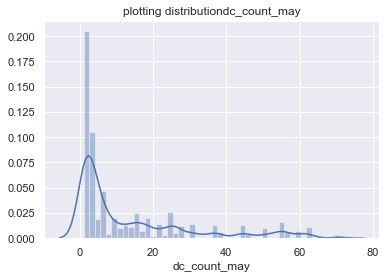

dc_count_jun


Text(0.5, 1.0, 'plotting distributiondc_count_jun')

Text(0.5, 0, 'dc_count_jun')

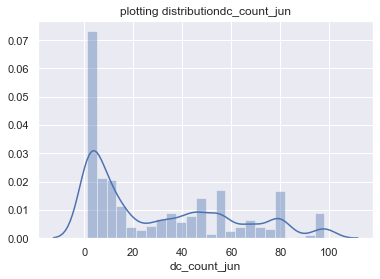

card_lim


Text(0.5, 1.0, 'plotting distributioncard_lim')

Text(0.5, 0, 'card_lim')

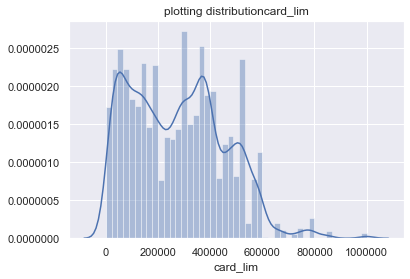

investment_1


Text(0.5, 1.0, 'plotting distributioninvestment_1')

Text(0.5, 0, 'investment_1')

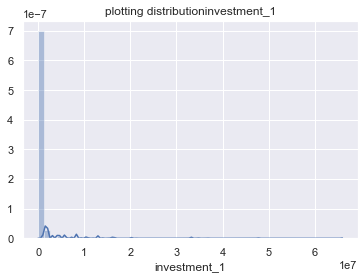

investment_2


Text(0.5, 1.0, 'plotting distributioninvestment_2')

Text(0.5, 0, 'investment_2')

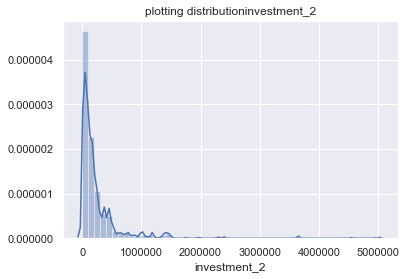

investment_3


Text(0.5, 1.0, 'plotting distributioninvestment_3')

Text(0.5, 0, 'investment_3')

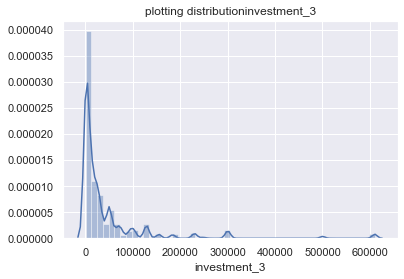

debit_amount_apr


Text(0.5, 1.0, 'plotting distributiondebit_amount_apr')

Text(0.5, 0, 'debit_amount_apr')

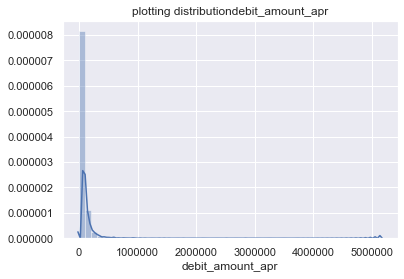

credit_amount_apr


Text(0.5, 1.0, 'plotting distributioncredit_amount_apr')

Text(0.5, 0, 'credit_amount_apr')

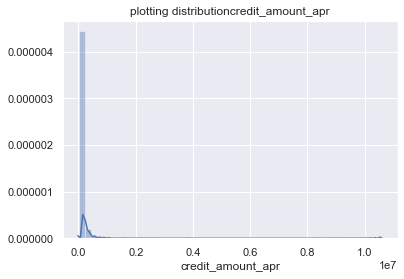

debit_count_apr


Text(0.5, 1.0, 'plotting distributiondebit_count_apr')

Text(0.5, 0, 'debit_count_apr')

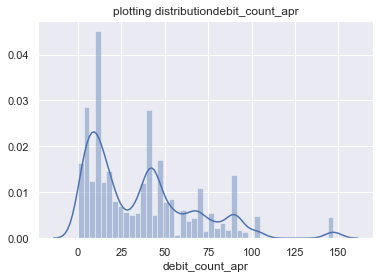

credit_count_apr


Text(0.5, 1.0, 'plotting distributioncredit_count_apr')

Text(0.5, 0, 'credit_count_apr')

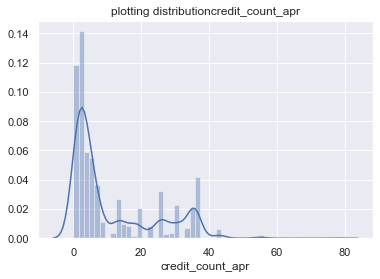

max_credit_amount_apr


Text(0.5, 1.0, 'plotting distributionmax_credit_amount_apr')

Text(0.5, 0, 'max_credit_amount_apr')

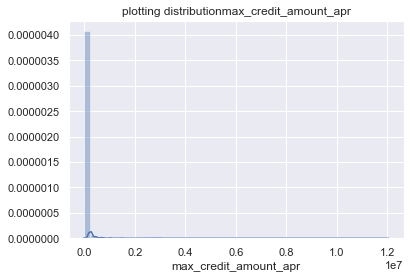

debit_amount_may


Text(0.5, 1.0, 'plotting distributiondebit_amount_may')

Text(0.5, 0, 'debit_amount_may')

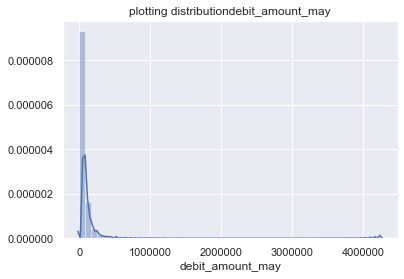

credit_amount_may


Text(0.5, 1.0, 'plotting distributioncredit_amount_may')

Text(0.5, 0, 'credit_amount_may')

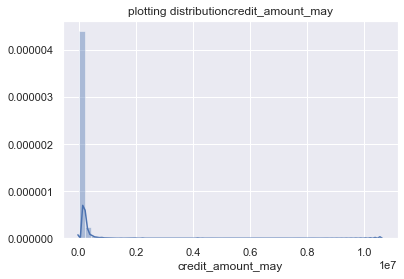

credit_count_may


Text(0.5, 1.0, 'plotting distributioncredit_count_may')

Text(0.5, 0, 'credit_count_may')

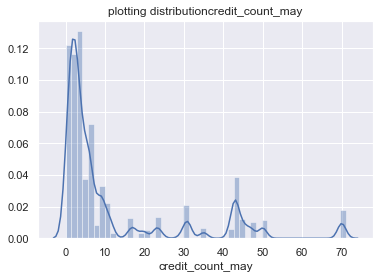

debit_count_may


Text(0.5, 1.0, 'plotting distributiondebit_count_may')

Text(0.5, 0, 'debit_count_may')

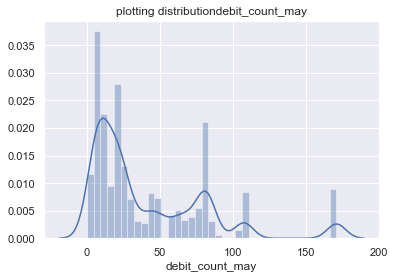

max_credit_amount_may


Text(0.5, 1.0, 'plotting distributionmax_credit_amount_may')

Text(0.5, 0, 'max_credit_amount_may')

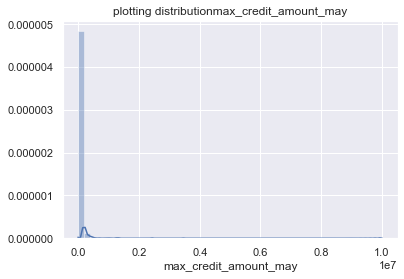

debit_amount_jun


Text(0.5, 1.0, 'plotting distributiondebit_amount_jun')

Text(0.5, 0, 'debit_amount_jun')

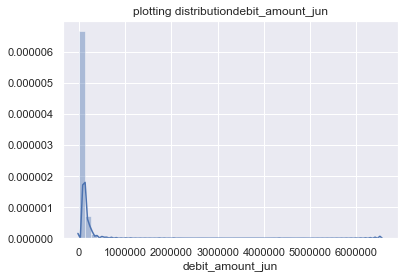

credit_amount_jun


Text(0.5, 1.0, 'plotting distributioncredit_amount_jun')

Text(0.5, 0, 'credit_amount_jun')

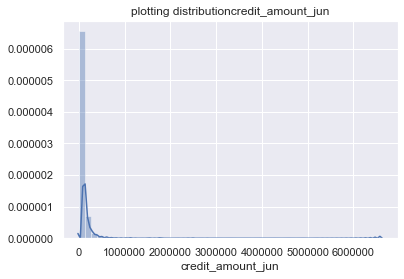

credit_count_jun


Text(0.5, 1.0, 'plotting distributioncredit_count_jun')

Text(0.5, 0, 'credit_count_jun')

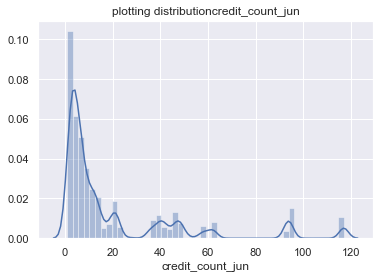

debit_count_jun


Text(0.5, 1.0, 'plotting distributiondebit_count_jun')

Text(0.5, 0, 'debit_count_jun')

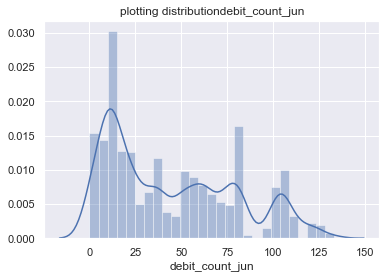

max_credit_amount_jun


Text(0.5, 1.0, 'plotting distributionmax_credit_amount_jun')

Text(0.5, 0, 'max_credit_amount_jun')

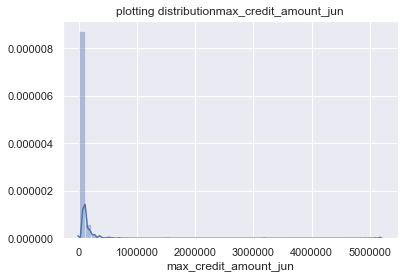

emi_active


Text(0.5, 1.0, 'plotting distributionemi_active')

Text(0.5, 0, 'emi_active')

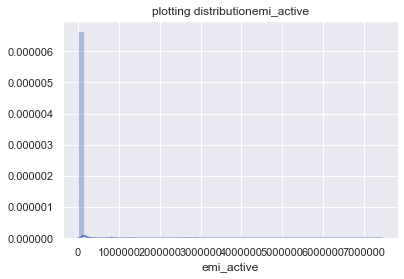

cc_cons


Text(0.5, 1.0, 'plotting distributioncc_cons')

Text(0.5, 0, 'cc_cons')

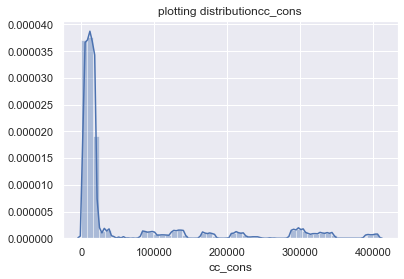

In [51]:
for col in num_col.columns:
    print(col)
    sns.distplot(num_col[col])
    plt.title('plotting distribution' + col)
    plt.xlabel(col)
    plt.show()

In [52]:
num_col.skew()

age                      0.59
cc_cons_apr              4.84
dc_cons_apr              7.14
cc_cons_may             12.06
dc_cons_may             25.32
cc_cons_jun              6.11
dc_cons_jun              6.57
cc_count_apr             4.42
cc_count_may             7.52
cc_count_jun             7.19
dc_count_apr             1.10
dc_count_may             1.53
dc_count_jun             0.73
card_lim                 0.44
investment_1            11.60
investment_2             5.48
investment_3             4.08
debit_amount_apr        13.10
credit_amount_apr       32.63
debit_count_apr          1.09
credit_count_apr         1.16
max_credit_amount_apr   47.95
debit_amount_may        10.30
credit_amount_may       23.39
credit_count_may         1.83
debit_count_may          1.49
max_credit_amount_may   35.92
debit_amount_jun        19.38
credit_amount_jun       14.86
credit_count_jun         2.08
debit_count_jun          0.57
max_credit_amount_jun   22.34
emi_active              30.39
cc_cons   

### Treat skewness by having square root transformation on coulmns having skew greater than 1

In [53]:
for col in num_col.columns:
    if num_col[col].skew()>1:
        num_col[col] = np.sqrt(num_col[col])

In [54]:
num_col

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,35.00,157.78,19.44,101.43,172.23,127.64,106.92,1.41,5.10,3.16,6.93,3.74,47.00,430000.00,24.36,35.27,28.05,293.12,158.72,4.90,2.45,159.05,107.37,437.92,1.41,6.32,156.73,173.35,112.96,1.41,65.00,225.47,40.92,141.47
17645,35.00,137.63,31.08,143.78,16.94,64.94,29.75,1.00,2.65,3.61,1.73,4.58,31.00,127500.00,462.12,415.55,300.87,110.71,297.81,5.92,6.00,284.17,303.77,266.76,1.41,8.83,154.75,205.23,276.05,4.58,63.00,152.40,114.21,100.86
7604,55.00,75.36,52.19,44.32,62.71,154.78,71.89,6.56,5.66,10.10,2.00,1.00,80.00,199999.00,407.32,685.57,159.76,184.91,291.34,8.49,3.00,196.13,139.08,266.42,1.41,9.06,103.69,241.61,274.38,2.65,1.00,164.43,159.30,126.87
1590,29.00,174.61,35.16,112.29,95.59,132.37,116.83,7.28,1.00,7.07,1.00,1.00,10.00,155000.00,286.13,472.63,220.23,107.51,486.13,6.56,5.48,229.63,209.45,251.07,4.80,6.16,112.28,264.29,262.12,4.58,83.00,207.45,59.53,87.79
16556,34.00,86.26,83.10,66.06,44.03,46.05,82.64,8.19,6.86,9.06,7.35,4.00,68.00,297000.00,23.85,620.48,428.95,130.47,242.69,6.78,6.00,140.05,391.48,174.03,4.90,7.07,158.79,100.35,283.09,2.83,32.00,179.01,113.05,310.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,53.00,102.19,34.91,85.16,62.23,81.44,100.53,1.73,6.00,1.73,6.63,7.42,29.00,520000.00,431.50,154.92,127.34,174.95,176.45,8.89,1.41,166.16,174.65,153.92,1.00,2.83,83.28,698.39,206.46,3.74,8.00,287.84,281.01,65.29
10376,44.00,172.89,79.42,126.59,87.24,47.04,29.01,1.00,5.83,2.00,2.65,1.00,2.00,472000.00,157.58,470.11,111.07,199.76,154.26,6.56,1.41,174.68,240.66,223.66,2.00,4.47,450.15,93.09,187.05,3.32,18.00,343.67,69.01,104.97
2181,37.00,64.41,30.80,139.14,22.23,210.63,42.45,7.55,4.80,7.81,4.90,1.73,3.00,44000.00,424.99,502.99,158.11,171.83,308.99,2.00,1.00,202.69,159.39,187.72,6.56,2.24,210.76,312.88,511.30,2.00,73.00,222.59,53.64,635.79


### Recheck skew 

age


Text(0.5, 1.0, 'plotting distributionage')

Text(0.5, 0, 'age')

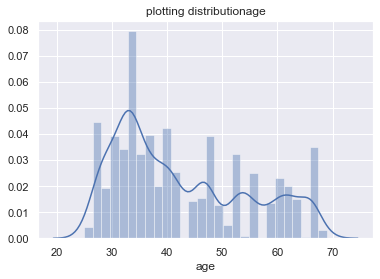

cc_cons_apr


Text(0.5, 1.0, 'plotting distributioncc_cons_apr')

Text(0.5, 0, 'cc_cons_apr')

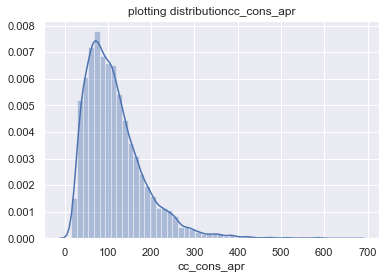

dc_cons_apr


Text(0.5, 1.0, 'plotting distributiondc_cons_apr')

Text(0.5, 0, 'dc_cons_apr')

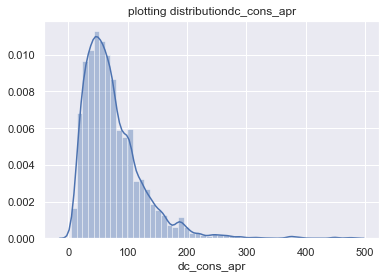

cc_cons_may


Text(0.5, 1.0, 'plotting distributioncc_cons_may')

Text(0.5, 0, 'cc_cons_may')

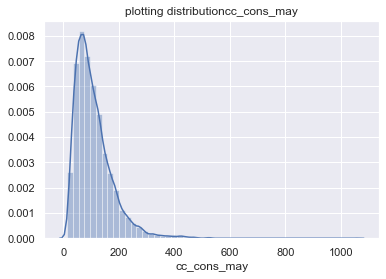

dc_cons_may


Text(0.5, 1.0, 'plotting distributiondc_cons_may')

Text(0.5, 0, 'dc_cons_may')

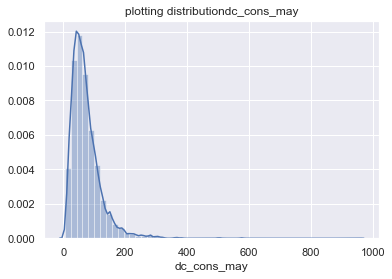

cc_cons_jun


Text(0.5, 1.0, 'plotting distributioncc_cons_jun')

Text(0.5, 0, 'cc_cons_jun')

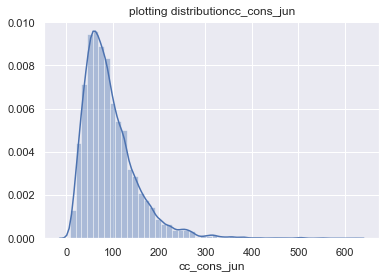

dc_cons_jun


Text(0.5, 1.0, 'plotting distributiondc_cons_jun')

Text(0.5, 0, 'dc_cons_jun')

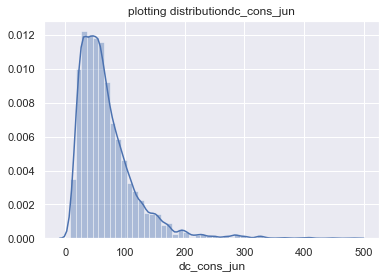

cc_count_apr


Text(0.5, 1.0, 'plotting distributioncc_count_apr')

Text(0.5, 0, 'cc_count_apr')

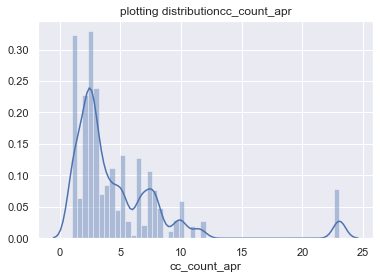

cc_count_may


Text(0.5, 1.0, 'plotting distributioncc_count_may')

Text(0.5, 0, 'cc_count_may')

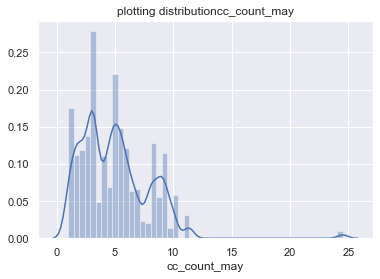

cc_count_jun


Text(0.5, 1.0, 'plotting distributioncc_count_jun')

Text(0.5, 0, 'cc_count_jun')

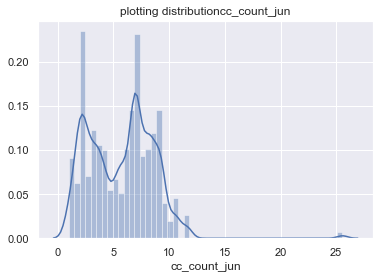

dc_count_apr


Text(0.5, 1.0, 'plotting distributiondc_count_apr')

Text(0.5, 0, 'dc_count_apr')

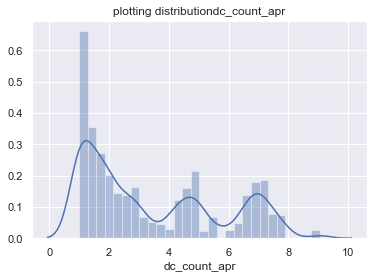

dc_count_may


Text(0.5, 1.0, 'plotting distributiondc_count_may')

Text(0.5, 0, 'dc_count_may')

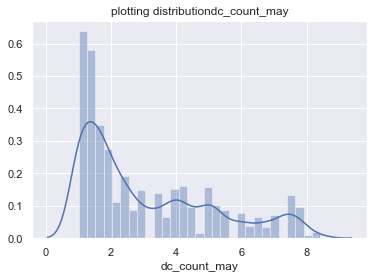

dc_count_jun


Text(0.5, 1.0, 'plotting distributiondc_count_jun')

Text(0.5, 0, 'dc_count_jun')

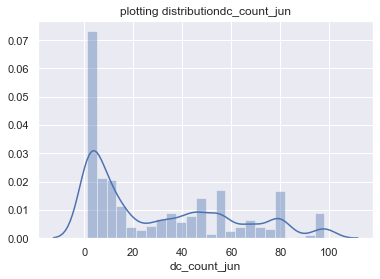

card_lim


Text(0.5, 1.0, 'plotting distributioncard_lim')

Text(0.5, 0, 'card_lim')

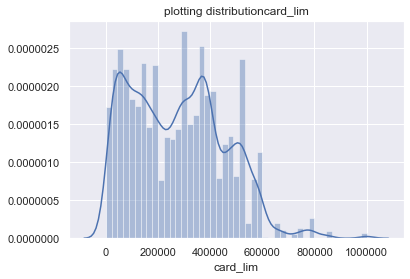

investment_1


Text(0.5, 1.0, 'plotting distributioninvestment_1')

Text(0.5, 0, 'investment_1')

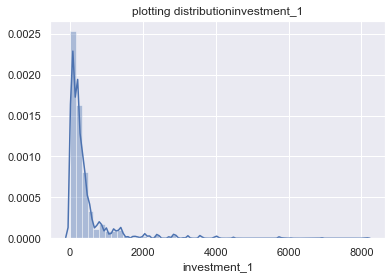

investment_2


Text(0.5, 1.0, 'plotting distributioninvestment_2')

Text(0.5, 0, 'investment_2')

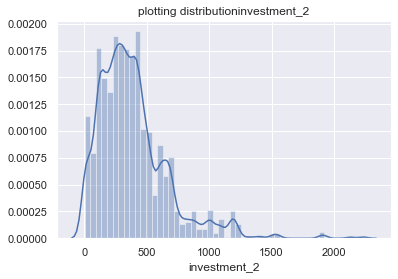

investment_3


Text(0.5, 1.0, 'plotting distributioninvestment_3')

Text(0.5, 0, 'investment_3')

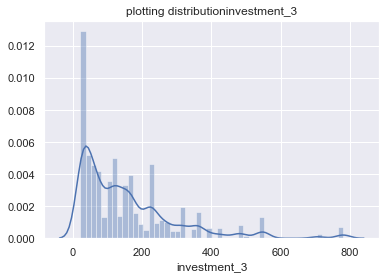

debit_amount_apr


Text(0.5, 1.0, 'plotting distributiondebit_amount_apr')

Text(0.5, 0, 'debit_amount_apr')

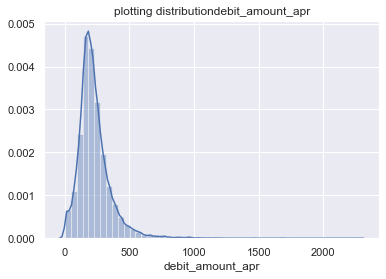

credit_amount_apr


Text(0.5, 1.0, 'plotting distributioncredit_amount_apr')

Text(0.5, 0, 'credit_amount_apr')

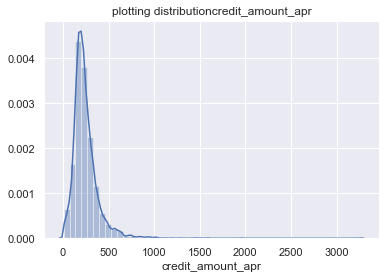

debit_count_apr


Text(0.5, 1.0, 'plotting distributiondebit_count_apr')

Text(0.5, 0, 'debit_count_apr')

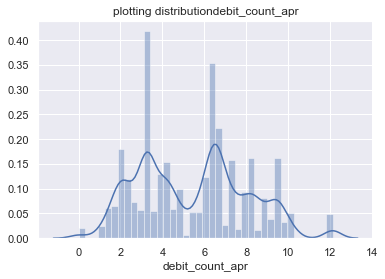

credit_count_apr


Text(0.5, 1.0, 'plotting distributioncredit_count_apr')

Text(0.5, 0, 'credit_count_apr')

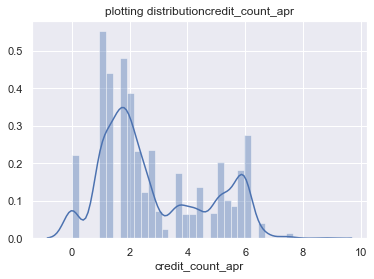

max_credit_amount_apr


Text(0.5, 1.0, 'plotting distributionmax_credit_amount_apr')

Text(0.5, 0, 'max_credit_amount_apr')

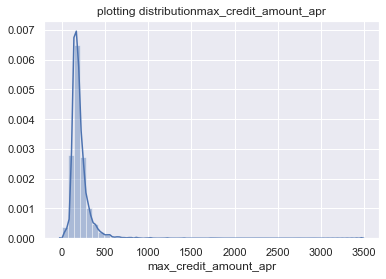

debit_amount_may


Text(0.5, 1.0, 'plotting distributiondebit_amount_may')

Text(0.5, 0, 'debit_amount_may')

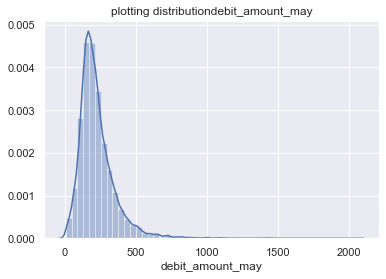

credit_amount_may


Text(0.5, 1.0, 'plotting distributioncredit_amount_may')

Text(0.5, 0, 'credit_amount_may')

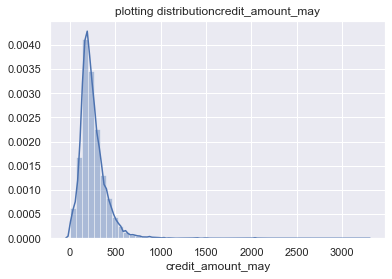

credit_count_may


Text(0.5, 1.0, 'plotting distributioncredit_count_may')

Text(0.5, 0, 'credit_count_may')

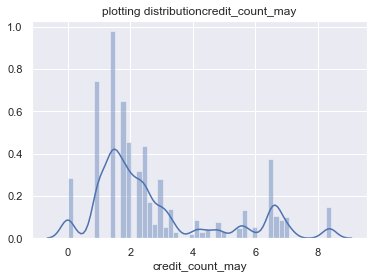

debit_count_may


Text(0.5, 1.0, 'plotting distributiondebit_count_may')

Text(0.5, 0, 'debit_count_may')

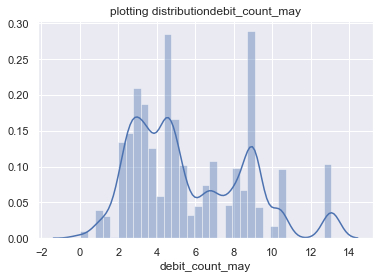

max_credit_amount_may


Text(0.5, 1.0, 'plotting distributionmax_credit_amount_may')

Text(0.5, 0, 'max_credit_amount_may')

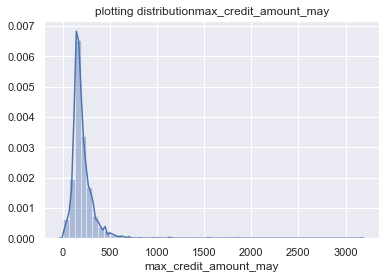

debit_amount_jun


Text(0.5, 1.0, 'plotting distributiondebit_amount_jun')

Text(0.5, 0, 'debit_amount_jun')

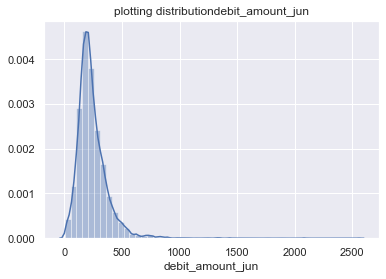

credit_amount_jun


Text(0.5, 1.0, 'plotting distributioncredit_amount_jun')

Text(0.5, 0, 'credit_amount_jun')

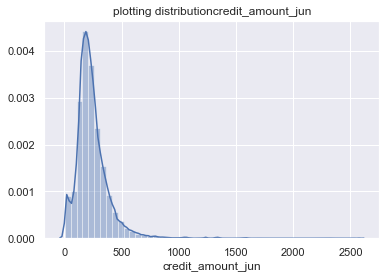

credit_count_jun


Text(0.5, 1.0, 'plotting distributioncredit_count_jun')

Text(0.5, 0, 'credit_count_jun')

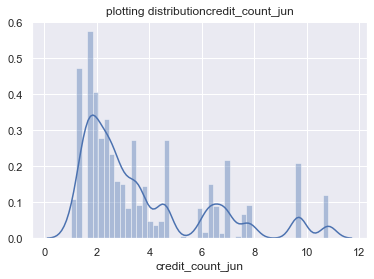

debit_count_jun


Text(0.5, 1.0, 'plotting distributiondebit_count_jun')

Text(0.5, 0, 'debit_count_jun')

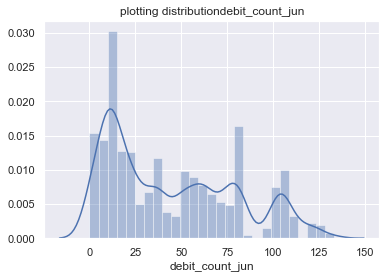

max_credit_amount_jun


Text(0.5, 1.0, 'plotting distributionmax_credit_amount_jun')

Text(0.5, 0, 'max_credit_amount_jun')

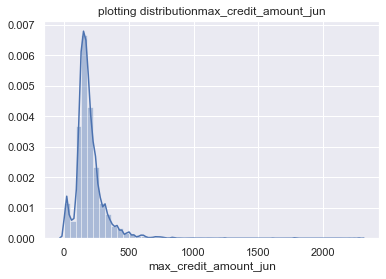

emi_active


Text(0.5, 1.0, 'plotting distributionemi_active')

Text(0.5, 0, 'emi_active')

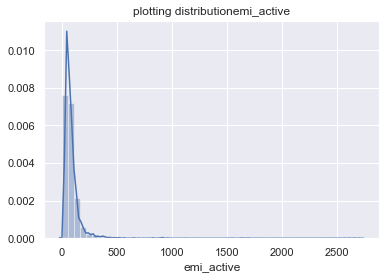

cc_cons


Text(0.5, 1.0, 'plotting distributioncc_cons')

Text(0.5, 0, 'cc_cons')

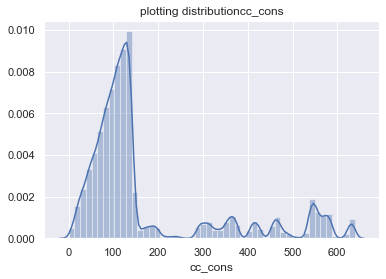

In [55]:
for col in num_col.columns:
    print(col)
    sns.distplot(num_col[col])
    plt.title('plotting distribution' + col)
    plt.xlabel(col)
    plt.show()

In [56]:
num_col.skew()

age                     0.59
cc_cons_apr             1.63
dc_cons_apr             2.21
cc_cons_may             2.00
dc_cons_may             3.29
cc_cons_jun             1.89
dc_cons_jun             2.32
cc_count_apr            2.65
cc_count_may            1.68
cc_count_jun            0.93
dc_count_apr            0.59
dc_count_may            0.88
dc_count_jun            0.73
card_lim                0.44
investment_1            4.71
investment_2            1.78
investment_3            1.83
debit_amount_apr        2.42
credit_amount_apr       4.07
debit_count_apr         0.24
credit_count_apr        0.59
max_credit_amount_apr   7.22
debit_amount_may        2.21
credit_amount_may       3.27
credit_count_may        1.16
debit_count_may         0.65
max_credit_amount_may   6.44
debit_amount_jun        3.40
credit_amount_jun       2.80
credit_count_jun        1.30
debit_count_jun         0.57
max_credit_amount_jun   4.16
emi_active              8.77
cc_cons                 1.61
dtype: float64

### Detect outliers with the help of IQR Formulae

In [57]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25) 
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

test_1 =detect_outliers(num_col)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text xticklabel objects>)

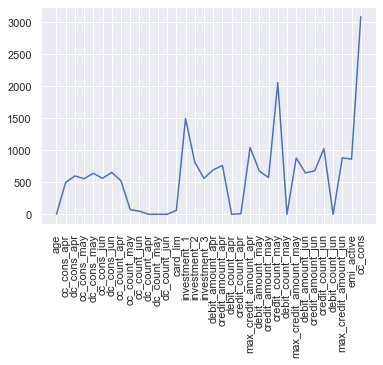

In [58]:
plt.plot(test_1['Feature'],test_1['Number of Outliers'])
plt.xticks(rotation=90)
plt.savefig("Before_Outlier.jpg")

In [59]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


num_col = treat_outliers(num_col)

# Checking for outliers after applying winsorization
test_2 =detect_outliers(num_col)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text xticklabel objects>)

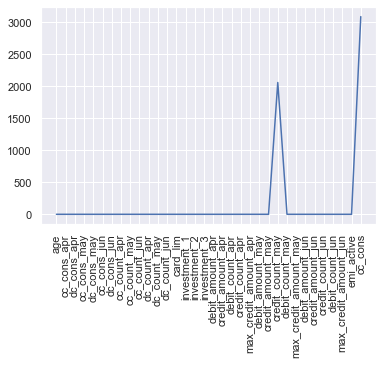

In [60]:
plt.plot(test_2['Feature'],test_2['Number of Outliers'])
plt.xticks(rotation=90)
plt.savefig("After_Outlier.jpg")

age


Text(0.5, 1.0, 'plotting distributionage')

Text(0.5, 0, 'age')

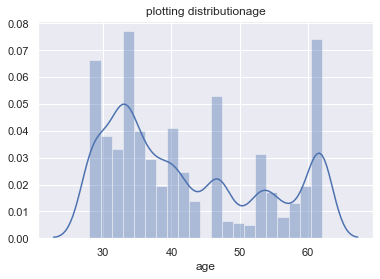

cc_cons_apr


Text(0.5, 1.0, 'plotting distributioncc_cons_apr')

Text(0.5, 0, 'cc_cons_apr')

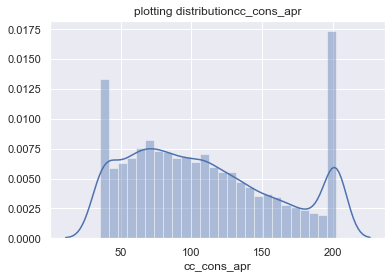

dc_cons_apr


Text(0.5, 1.0, 'plotting distributiondc_cons_apr')

Text(0.5, 0, 'dc_cons_apr')

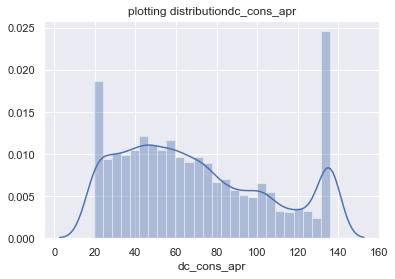

cc_cons_may


Text(0.5, 1.0, 'plotting distributioncc_cons_may')

Text(0.5, 0, 'cc_cons_may')

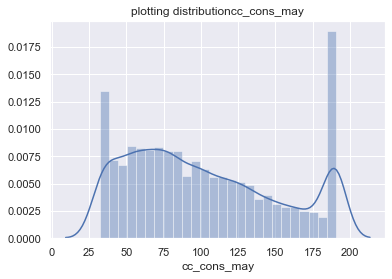

dc_cons_may


Text(0.5, 1.0, 'plotting distributiondc_cons_may')

Text(0.5, 0, 'dc_cons_may')

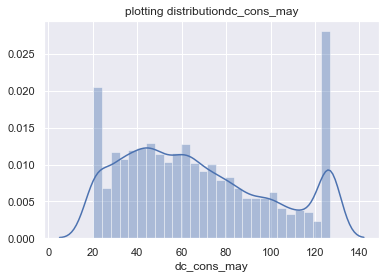

cc_cons_jun


Text(0.5, 1.0, 'plotting distributioncc_cons_jun')

Text(0.5, 0, 'cc_cons_jun')

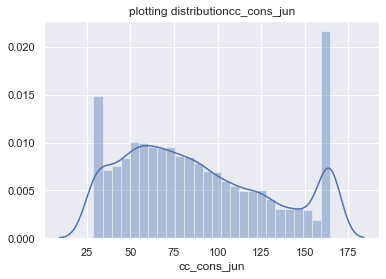

dc_cons_jun


Text(0.5, 1.0, 'plotting distributiondc_cons_jun')

Text(0.5, 0, 'dc_cons_jun')

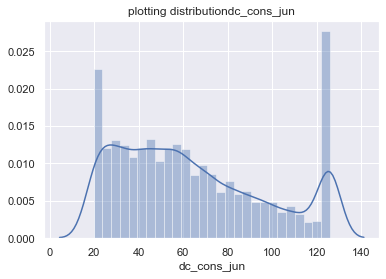

cc_count_apr


Text(0.5, 1.0, 'plotting distributioncc_count_apr')

Text(0.5, 0, 'cc_count_apr')

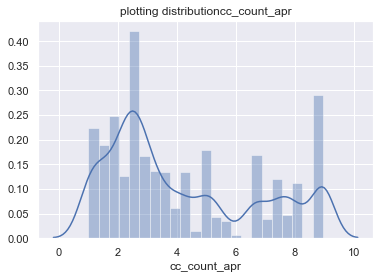

cc_count_may


Text(0.5, 1.0, 'plotting distributioncc_count_may')

Text(0.5, 0, 'cc_count_may')

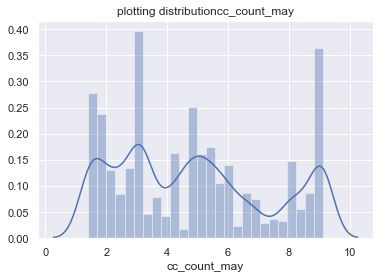

cc_count_jun


Text(0.5, 1.0, 'plotting distributioncc_count_jun')

Text(0.5, 0, 'cc_count_jun')

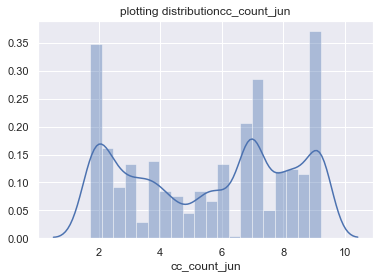

dc_count_apr


Text(0.5, 1.0, 'plotting distributiondc_count_apr')

Text(0.5, 0, 'dc_count_apr')

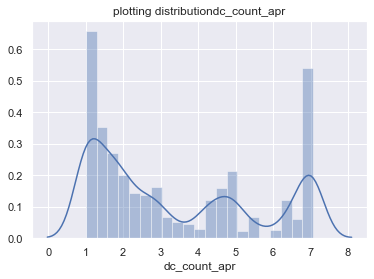

dc_count_may


Text(0.5, 1.0, 'plotting distributiondc_count_may')

Text(0.5, 0, 'dc_count_may')

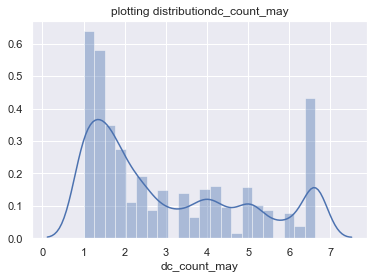

dc_count_jun


Text(0.5, 1.0, 'plotting distributiondc_count_jun')

Text(0.5, 0, 'dc_count_jun')

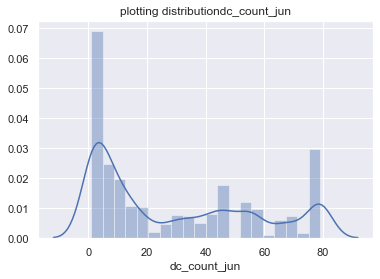

card_lim


Text(0.5, 1.0, 'plotting distributioncard_lim')

Text(0.5, 0, 'card_lim')

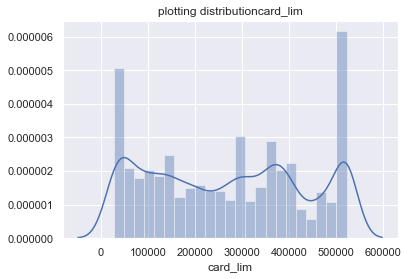

investment_1


Text(0.5, 1.0, 'plotting distributioninvestment_1')

Text(0.5, 0, 'investment_1')

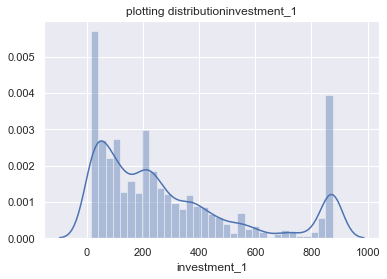

investment_2


Text(0.5, 1.0, 'plotting distributioninvestment_2')

Text(0.5, 0, 'investment_2')

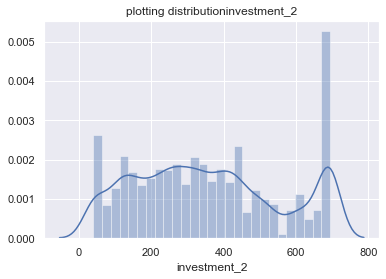

investment_3


Text(0.5, 1.0, 'plotting distributioninvestment_3')

Text(0.5, 0, 'investment_3')

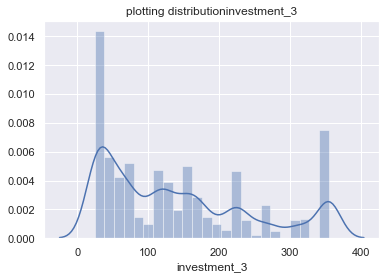

debit_amount_apr


Text(0.5, 1.0, 'plotting distributiondebit_amount_apr')

Text(0.5, 0, 'debit_amount_apr')

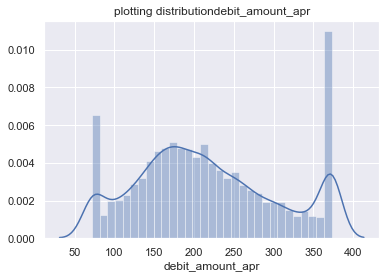

credit_amount_apr


Text(0.5, 1.0, 'plotting distributioncredit_amount_apr')

Text(0.5, 0, 'credit_amount_apr')

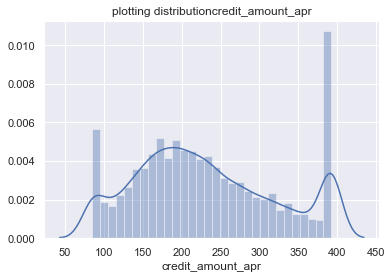

debit_count_apr


Text(0.5, 1.0, 'plotting distributiondebit_count_apr')

Text(0.5, 0, 'debit_count_apr')

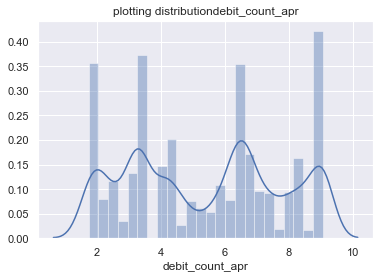

credit_count_apr


Text(0.5, 1.0, 'plotting distributioncredit_count_apr')

Text(0.5, 0, 'credit_count_apr')

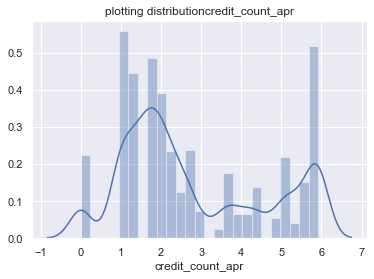

max_credit_amount_apr


Text(0.5, 1.0, 'plotting distributionmax_credit_amount_apr')

Text(0.5, 0, 'max_credit_amount_apr')

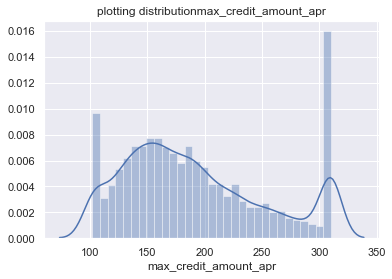

debit_amount_may


Text(0.5, 1.0, 'plotting distributiondebit_amount_may')

Text(0.5, 0, 'debit_amount_may')

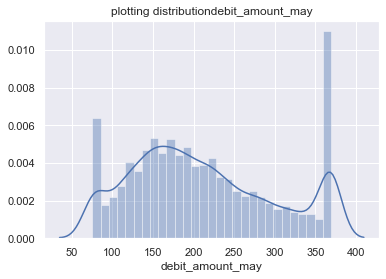

credit_amount_may


Text(0.5, 1.0, 'plotting distributioncredit_amount_may')

Text(0.5, 0, 'credit_amount_may')

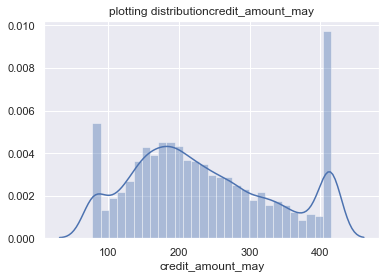

credit_count_may


Text(0.5, 1.0, 'plotting distributioncredit_count_may')

Text(0.5, 0, 'credit_count_may')

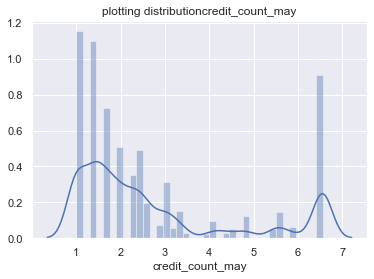

debit_count_may


Text(0.5, 1.0, 'plotting distributiondebit_count_may')

Text(0.5, 0, 'debit_count_may')

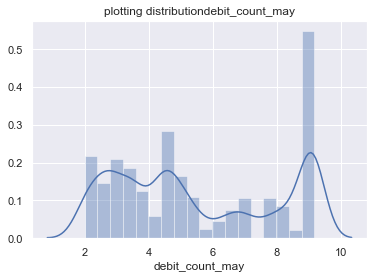

max_credit_amount_may


Text(0.5, 1.0, 'plotting distributionmax_credit_amount_may')

Text(0.5, 0, 'max_credit_amount_may')

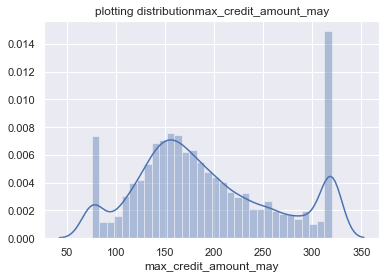

debit_amount_jun


Text(0.5, 1.0, 'plotting distributiondebit_amount_jun')

Text(0.5, 0, 'debit_amount_jun')

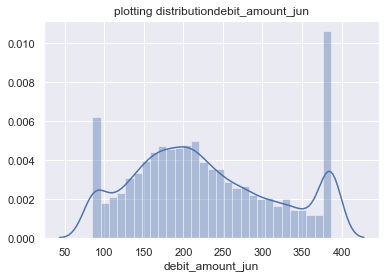

credit_amount_jun


Text(0.5, 1.0, 'plotting distributioncredit_amount_jun')

Text(0.5, 0, 'credit_amount_jun')

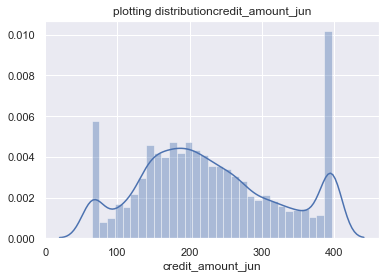

credit_count_jun


Text(0.5, 1.0, 'plotting distributioncredit_count_jun')

Text(0.5, 0, 'credit_count_jun')

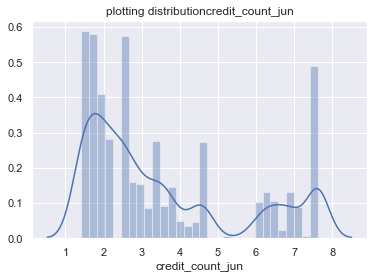

debit_count_jun


Text(0.5, 1.0, 'plotting distributiondebit_count_jun')

Text(0.5, 0, 'debit_count_jun')

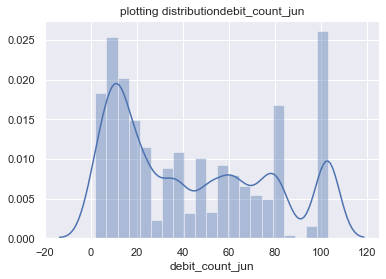

max_credit_amount_jun


Text(0.5, 1.0, 'plotting distributionmax_credit_amount_jun')

Text(0.5, 0, 'max_credit_amount_jun')

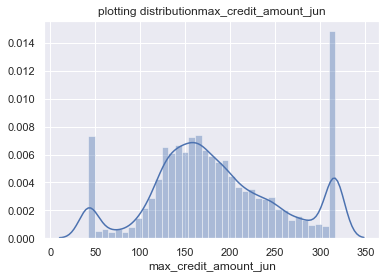

emi_active


Text(0.5, 1.0, 'plotting distributionemi_active')

Text(0.5, 0, 'emi_active')

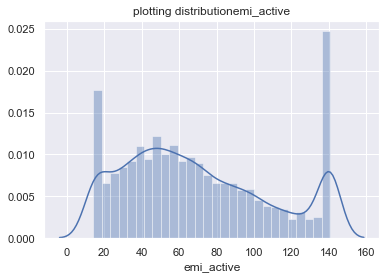

cc_cons


Text(0.5, 1.0, 'plotting distributioncc_cons')

Text(0.5, 0, 'cc_cons')

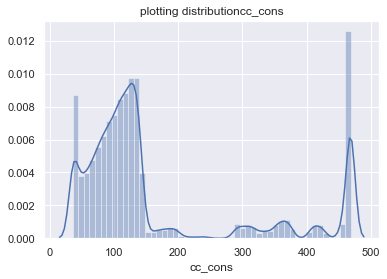

In [70]:
for col in num_col.columns:
    print(col)
    sns.distplot(num_col[col])
    plt.title('plotting distribution' + col)
    plt.xlabel(col)
    plt.show()

### credit count may column was not taken care by winsorize so its skewness was checked and found near by 1 so ignored

In [134]:
num_col['credit_count_may'].skew()

1.1130569349794515

### one hot encoding on categorical column and dropped loan enq column as it had only a single class Also concatenation of numerical and categorical columns

In [193]:
ohe=pd.get_dummies(cat_col)
ohe.drop('loan_enq_Y',1,inplace = True)
df = pd.concat([ohe,num_col],1)

In [136]:
df

,account_type_current,account_type_saving,gender_F,gender_M,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,1,0,0,1,35.00,157.78,19.44,101.43,126.80,127.64,106.92,1.41,5.10,3.16,6.93,3.74,47.00,430000.00,24.36,40.39,28.05,293.12,158.72,4.90,2.45,159.05,107.37,415.13,1.41,6.32,156.73,173.35,112.96,1.41,65.00,225.47,40.92,141.47
17645,1,0,0,1,35.00,137.63,31.08,143.78,20.27,64.94,29.75,1.00,2.65,3.61,1.73,4.58,31.00,127500.00,462.12,415.55,300.87,110.71,297.81,5.92,5.92,284.17,303.77,266.76,1.41,8.83,154.75,205.23,276.05,4.58,63.00,152.40,114.21,100.86
7604,1,0,0,1,55.00,75.36,52.19,44.32,62.71,154.78,71.89,6.56,5.66,9.22,2.00,1.00,79.00,199999.00,407.32,685.57,159.76,184.91,291.34,8.49,3.00,196.13,139.08,266.42,1.41,9.06,103.69,241.61,274.38,2.65,2.00,164.43,140.78,126.87
1590,1,0,1,0,29.00,174.61,35.16,112.29,95.59,132.37,116.83,7.28,1.41,7.07,1.00,1.00,10.00,155000.00,286.13,472.63,220.23,107.51,392.52,6.56,5.48,229.63,209.45,251.07,4.80,6.16,112.28,264.29,262.12,4.58,83.00,207.45,59.53,87.79
16556,1,0,0,1,34.00,86.26,83.10,66.06,44.03,46.05,82.64,8.19,6.86,9.06,7.07,4.00,68.00,297000.00,23.85,620.48,354.97,130.47,242.69,6.78,5.92,140.05,369.19,174.03,4.90,7.07,158.79,100.35,283.09,2.83,32.00,179.01,113.05,310.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,0,1,0,53.00,102.19,34.91,85.16,62.23,81.44,100.53,1.73,6.00,1.73,6.63,6.63,29.00,520000.00,431.50,154.92,127.34,174.95,176.45,8.89,1.41,166.16,174.65,153.92,1.00,2.83,83.28,386.75,206.46,3.74,8.00,287.84,140.78,65.29
10376,1,0,0,1,44.00,172.89,79.42,126.59,87.24,47.04,29.01,1.00,5.83,2.00,2.65,1.00,2.00,472000.00,157.58,470.11,111.07,199.76,154.26,6.56,1.41,174.68,240.66,223.66,2.00,4.47,320.16,93.09,187.05,3.32,18.00,316.52,69.01,104.97
2181,1,0,0,1,37.00,64.41,30.80,139.14,22.23,164.45,42.45,7.55,4.80,7.81,4.90,1.73,3.00,44000.00,424.99,502.99,158.11,171.83,308.99,2.00,1.00,202.69,159.39,187.72,6.56,2.24,210.76,312.88,396.87,2.00,73.00,222.59,53.64,468.71


### Splitting X and y for features and target

In [194]:
X = df.drop(['cc_cons'],1)
y = df['cc_cons']

### Apply minmax scaler as such previously we found that it slightly reduces the rmsle  on basis of it we applied minmax scaler

In [195]:
columns = X.columns
from sklearn.preprocessing import  MinMaxScaler
scaler =  MinMaxScaler()
X[columns] = scaler.fit_transform(X[columns])

In [196]:
X

,account_type_current,account_type_saving,gender_F,gender_M,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,1.00,0.00,0.00,1.00,0.21,0.73,0.00,0.44,1.00,0.73,0.82,0.05,0.48,0.19,0.98,0.49,0.59,0.81,0.01,0.00,0.01,0.73,0.24,0.43,0.41,0.27,0.11,1.00,0.07,0.60,0.33,0.29,0.15,0.00,0.62,0.67,0.21
17645,1.00,0.00,0.00,1.00,0.21,0.61,0.10,0.70,0.00,0.27,0.09,0.00,0.16,0.25,0.12,0.64,0.38,0.20,0.52,0.57,0.84,0.13,0.69,0.57,1.00,0.87,0.78,0.56,0.07,0.95,0.33,0.40,0.64,0.51,0.60,0.40,0.79
7604,1.00,0.00,0.00,1.00,0.79,0.24,0.28,0.08,0.40,0.93,0.49,0.70,0.55,1.00,0.16,0.00,1.00,0.35,0.46,0.99,0.41,0.38,0.67,0.92,0.51,0.45,0.22,0.56,0.07,0.98,0.12,0.52,0.63,0.20,0.00,0.45,1.00
1590,1.00,0.00,1.00,0.00,0.03,0.83,0.14,0.51,0.71,0.76,0.91,0.79,0.00,0.71,0.00,0.00,0.12,0.26,0.32,0.66,0.59,0.12,1.00,0.66,0.93,0.61,0.46,0.51,0.68,0.58,0.15,0.59,0.59,0.51,0.80,0.60,0.36
16556,1.00,0.00,0.00,1.00,0.18,0.31,0.55,0.21,0.22,0.13,0.59,0.90,0.71,0.98,1.00,0.53,0.86,0.55,0.01,0.89,1.00,0.20,0.51,0.69,1.00,0.18,1.00,0.29,0.70,0.71,0.34,0.05,0.66,0.23,0.30,0.50,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1.00,0.00,1.00,0.00,0.74,0.40,0.13,0.33,0.39,0.39,0.76,0.09,0.60,0.00,0.93,1.00,0.36,1.00,0.48,0.18,0.31,0.34,0.30,0.98,0.24,0.31,0.34,0.23,0.00,0.12,0.03,1.00,0.43,0.38,0.06,0.90,1.00
10376,1.00,0.00,0.00,1.00,0.47,0.82,0.52,0.60,0.63,0.13,0.09,0.00,0.57,0.04,0.27,0.00,0.01,0.90,0.17,0.66,0.26,0.43,0.23,0.66,0.24,0.35,0.56,0.43,0.18,0.35,1.00,0.03,0.37,0.31,0.16,1.00,0.43
2181,1.00,0.00,0.00,1.00,0.26,0.17,0.10,0.68,0.02,1.00,0.21,0.82,0.44,0.81,0.64,0.13,0.03,0.03,0.48,0.71,0.40,0.33,0.73,0.04,0.17,0.48,0.29,0.33,1.00,0.03,0.55,0.76,1.00,0.09,0.70,0.66,0.31


### Spliting training and testing data

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### A visual representaion of target variable w.r.t skewness

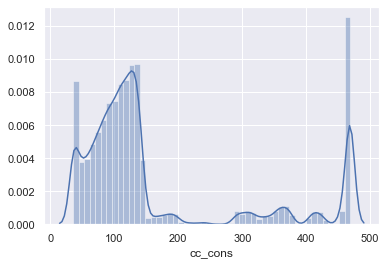

In [151]:
sns.distplot(y_train)

### Applying log to target variable so that it helps to reduce the rmsle more efficiently

In [230]:
y_train = np.log(y_train)

### Baseline model preparation

In [153]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
y_pred = lr.predict(X_test)

### Taking Exponential of prediction 

In [155]:
y_pred = np.exp(y_pred)

In [82]:
y_pred

array([122.08133464, 124.97641006, 118.78839892, ..., 128.94358718,
       120.65904401, 125.4655539 ])

In [156]:
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, y_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_score: ",r2_score(y_test,y_pred))

Test RMSLE: 0.7176198106414681
Test RMSE: 144.0641595096318
R2_score:  -0.10007318335212423


In [167]:
print("Prediction for 10 observation:    ",y_pred[0:10])
print("Actual values for 10 observation: ",y_test[0:10].values)

Prediction for 10 observation:     [122.08133464 124.97641006 118.78839892 127.44134888 120.18863898
 126.44959244 135.13171913 129.44825811 123.52039078 125.4655539 ]
Actual values for 10 observation:  [ 74.07428704 107.98611022 343.20256409  69.49100661 109.57189421
 315.45998161 102.45974819 108.66922287  82.56512581 468.7077981 ]


### polynomial features

In [168]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

#Code starts here
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, (y_train))
y_pred_p = model.predict(X_test)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [169]:
y_pred_p = np.exp(y_pred_p)

In [170]:
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, y_pred_p)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_p)))
print("R2_score: ",r2_score(y_test,y_pred_p))

Test RMSLE: 0.7404541461768797
Test RMSE: 145.7980782378528
R2_score:  -0.1267129279239858


### Lasso

In [172]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, (y_train))
lasso_pred = lasso.predict(X_test)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [173]:
lasso_pred = np.exp(lasso_pred)

### lasso made all coeff zero since none of features were corelated to the target

In [174]:
(lasso.coef_ == 0).sum()

37

In [175]:
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, lasso_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, lasso_pred)))
print("R2_score: ",r2_score(y_test,lasso_pred))

Test RMSLE: 0.7166867702644635
Test RMSE: 143.9966648871789
R2_score:  -0.09904264763172876


### Ridge

In [176]:
from sklearn.linear_model import Ridge

# Code starts here
ridge = Ridge()
ridge.fit(X_train, (y_train))
ridge_pred = ridge.predict(X_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [177]:
ridge_pred = np.exp(ridge_pred)

In [178]:
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, ridge_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("R2_score: ",r2_score(y_test,ridge_pred))

Test RMSLE: 0.7178496791190248
Test RMSE: 144.1145878115316
R2_score:  -0.10084345865182898


### pca

In [197]:
# Apply PCA and fit the logistic model on train data use df dataset
nof_list=[10,15,20,25,30,35,37]
high_score=0
nof=0

for n in nof_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
    y_train = np.log(y_train)
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_pred = np.exp(y_pred)
    print("For no of features=",n,", rmsle=", np.sqrt(mean_squared_log_error(y_test, y_pred)))
    
    if np.sqrt(mean_squared_log_error(y_test, y_pred))>high_score:
        high_score=np.sqrt(mean_squared_log_error(y_test, y_pred))
        nof=n 
print("High Score is:",high_score, "with features=",nof)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For no of features= 10 , rmsle= 0.7074151934671966


PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For no of features= 15 , rmsle= 0.7067597445336058


PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For no of features= 20 , rmsle= 0.7067546469292184


PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For no of features= 25 , rmsle= 0.7068404402374542


PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For no of features= 30 , rmsle= 0.7068735426172795


PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For no of features= 35 , rmsle= 0.707291200047381


PCA(copy=True, iterated_power='auto', n_components=37, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For no of features= 37 , rmsle= 0.7072952132828964
High Score is: 0.7074151934671966 with features= 10


### Decision Tree with RandomSearchCV

In [203]:
dt_reg = DecisionTreeRegressor(random_state=42)
param_grid = dict(max_depth=range(5,20), min_samples_split=range(50,200,10), min_samples_leaf=range(25,100,10), max_leaf_nodes=range(8,32,2), min_impurity_decrease=(0.3,1.0,0.1))
grid_dt = RandomizedSearchCV(dt_reg, param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=5, random_state=33)
grid_dt.fit(X_train,y_train)
dt_pred = grid_dt.best_estimator_.predict(X_test)
dt_pred = np.exp(dt_pred)
print(grid_dt.best_params_)

print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, dt_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, dt_pred)))
print("R2_score: ",r2_score(y_test,dt_pred))



RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=42,
                                                   splitter='best'),
                   iid='dep

{'min_samples_split': 120, 'min_samples_leaf': 55, 'min_impurity_decrease': 1.0, 'max_leaf_nodes': 18, 'max_depth': 10}
Test RMSLE: 0.7166867702644646
Test RMSE: 143.9966648871803
R2_score:  -0.09904264763174986


### RandomForest with RandomSearchCV

In [207]:
rf_model = RandomForestRegressor(random_state=33)
param_grid = dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid_rf = RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
grid_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [208]:
rf_pred = grid_rf.best_estimator_.predict(X_test)
rf_pred = np.exp(rf_pred)
print(grid_rf.best_params_)

print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, rf_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2_score: ",r2_score(y_test,rf_pred))


{'n_estimators': 40, 'min_samples_split': 310, 'min_samples_leaf': 35, 'max_leaf_nodes': 8, 'max_depth': 19}
Test RMSLE: 0.7176171137176702
Test RMSE: 144.02635838729503
R2_score:  -0.09949596073834721


### XGB with randomsearchCV

In [209]:
xgb_model = XGBRegressor(objective='reg:squarederror',n_jobs=-1)
param_grid = {'max_depth':range(5,15,3),'learning_rate':np.arange(0.01,0.3,0.01),'n_estimators':range(100,200,10),'min_child_weight':range(1,15,2),'reg_lambda':range(0,5,1),'subsample':np.arange(60,110,10)/100,'colsample_bylevel':np.arange(60,110,10)/100,'colsample_bytree':np.arange(60,110,10)/100,'colsample_bynode':np.arange(60,110,10)/100,'scale_pos_weight':np.arange(1,15,1)}
grid_xgb = RandomizedSearchCV(xgb_model,param_grid,scoring='neg_mean_squared_error',cv=5,random_state=33)
grid_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]),
                                        'max_depth': range(5, 15, 3),
                                        'min_child_weight': range(1

In [210]:
xgb_pred = grid_xgb.best_estimator_.predict(X_test)
xgb_pred = np.exp(xgb_pred)
print(grid_xgb.best_params_)


print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, xgb_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, xgb_pred)))
3print("R2_score: ",r2_score(y_test,xgb_pred))

{'subsample': 0.8, 'scale_pos_weight': 1, 'reg_lambda': 3, 'n_estimators': 110, 'min_child_weight': 9, 'max_depth': 5, 'learning_rate': 0.09999999999999999, 'colsample_bytree': 1.0, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.8}
Test RMSLE: 0.7277175325303841
Test RMSE: 144.80241695534977
R2_score:  -0.11137673201634435


### Feature selection

In [211]:
def feature_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Random Forest':RandomForestRegressor ,'Linear Reggression':LinearRegression}

# Selecting 8 number of features
for i in models.items():
    feature_selection(X,y,15,i[1])

Features  to be selected for Random Forest are:
['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'debit_amount_apr', 'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']
Features  to be selected for Linear Reggression are:
['age', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_may', 'investment_1', 'investment_2', 'investment_3', 'credit_amount_apr', 'max_credit_amount_apr', 'credit_count_may', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']


### Random forest with best features

In [212]:
X_train = X_train[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'debit_amount_apr', 'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']]
X_test = X_test[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'debit_amount_apr', 'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']]

rf_model=RandomForestRegressor(random_state=72)
param_grid=dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid=RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [213]:
rf1_pred = grid.best_estimator_.predict(X_test)
rf1_pred = np.exp(rf1_pred)
print(grid.best_params_)


print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, rf1_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, rf1_pred)))
print("R2_score: ",r2_score(y_test,rf1_pred))

{'n_estimators': 80, 'min_samples_split': 490, 'min_samples_leaf': 25, 'max_leaf_nodes': 22, 'max_depth': 13}
Test RMSLE: 0.7182049226667834
Test RMSE: 144.11004847121308
R2_score:  -0.10077411071873765


### Linear Regg with best features

In [218]:
X_train = X_train[['age', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_may', 'investment_1', 'investment_2', 'investment_3', 'credit_amount_apr', 'max_credit_amount_apr', 'credit_count_may', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']]
X_test = X_test[['age', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_may', 'investment_1', 'investment_2', 'investment_3', 'credit_amount_apr', 'max_credit_amount_apr', 'credit_count_may', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']]
y_train = np.log(y_train)
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred1 = lr1.predict(X_test)
y_pred1 = np.exp(y_pred1)
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, y_pred1)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_pred1)))
print("R2_score: ",r2_score(y_test,y_pred1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Test RMSLE: 0.7165409925320956
Test RMSE: 143.9482634107115
R2_score:  -0.09830393126431236


In [219]:
from sklearn.ensemble import GradientBoostingRegressor
model_10 = GradientBoostingRegressor(n_estimators=10, max_depth=6, random_state=0).fit(X_train, y_train)
model_50 = GradientBoostingRegressor(n_estimators=50, max_depth=6, random_state=0).fit(X_train, y_train)
model_100 = GradientBoostingRegressor(n_estimators=100, max_depth=6, random_state=0).fit(X_train, y_train)
y_pred_10 = model_10.predict(X_test)
y_pred_50 = model_50.predict(X_test)
y_pred_100 = model_100.predict(X_test)
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, y_pred_10)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_10)))
print("R2_score: ",r2_score(y_test,y_pred_10))
print('========================================================')
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, y_pred_50)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_50)))
print("R2_score: ",r2_score(y_test,y_pred_50))
print('========================================================')
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, y_pred_100)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_100)))
print("R2_score: ",r2_score(y_test,y_pred_100))
print('========================================================')


Test RMSLE: 3.175330904502708
Test RMSE: 213.22387831605172
R2_score:  -1.4098019704040925
Test RMSLE: 3.175371138337052
Test RMSE: 213.22295148012293
R2_score:  -1.4097810207223698
Test RMSLE: 3.175773487532146
Test RMSE: 213.2244470680244
R2_score:  -1.4098148262011376


Text(0.5, 0, 'Feature Importance Score')

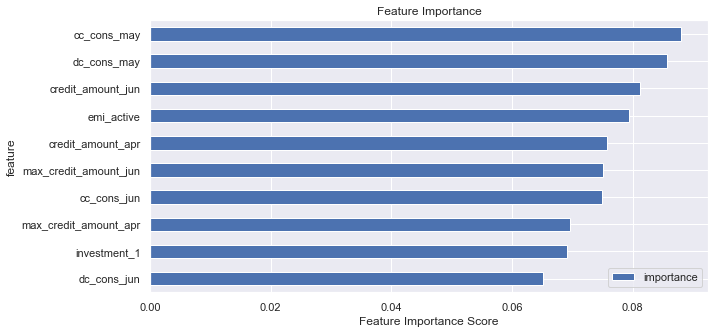

In [223]:
feat_imp = pd.DataFrame({'importance':model_100.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:10]

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Feature Importance", figsize=(10,5))
plt.xlabel('Feature Importance Score')
plt.show()

In [61]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
# calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0,1]
        cor_list.append(cor)
# replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
# feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
# feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y,20)
print(str(len(cor_feature)), 'selected features')


NameError: name 'X' is not defined

In [239]:
cor_feature

['investment_1',
 'investment_2',
 'max_credit_amount_jun',
 'credit_count_may',
 'dc_cons_jun',
 'max_credit_amount_apr',
 'age',
 'dc_cons_may',
 'credit_amount_apr',
 'credit_amount_jun',
 'cc_cons_jun',
 'cc_cons_may',
 'cc_count_may',
 'emi_active',
 'investment_3']

In [234]:
X_train = X_train[cor_feature]
X_test = X_test[cor_feature]
y_train = np.log(y_train)
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred1 = lr1.predict(X_test)
y_pred1 = np.exp(y_pred1)
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, y_pred1)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_pred1)))
print("R2_score: ",r2_score(y_test,y_pred1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Test RMSLE: 0.701747546619664
Test RMSE: 139.9051620081616
R2_score:  -0.08118530508492494


# Test data 

In [270]:
t_df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\jupyrt_files\\hackathon_data\\Test.csv')

In [271]:
t_df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.00,6141.05,676.50,9146.10,15479.00,4.00,10.00,4.00,47.00,56.00,6.00,125000.00,1.00,1.00,1.00,1.00,13.80,376600.50,1633.00,-5715.49,27646.84,44341.00,16.00,36.00,24485.00,23512.67,41755.00,24.00,20.00,9750.00,30527.88,31271.00,3.00,12.00,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.00,1670.00,2463.92,10947.50,956.00,3.00,10.00,4.00,50.00,38.00,31.00,59000.00,1.00,1.00,1.00,1.00,101891.25,470000.00,891.00,35346.00,32247.25,21946.00,42.00,5.00,3375.00,15049.44,130299.00,43.00,40.00,16967.00,14342.83,16582.00,6.00,39.00,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.00,2696.09,766.00,716.00,4133.22,7.00,30.00,5.00,24.00,27.00,2.00,49999.00,1.00,1.00,1.00,1.00,53374.97,674291.83,54101.00,2557.00,63169.00,36616.50,41.00,6.00,14950.00,133659.00,40422.00,42.00,35.00,36398.00,32503.16,33539.54,5.00,9.00,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.93,18225.00,34763.56,167.00,4260.27,20185.00,1.00,99.00,71.00,5.00,1.00,11.00,520000.00,1.00,1.00,1.00,1.00,9118.35,470000.00,5905.00,5464.00,39442.80,43173.38,46.00,1.00,235844.00,99686.03,48148.00,3.00,5.00,97825.00,93572.42,109429.75,21.00,0.00,72317.00,Y,340.79
4,14727,current,M,62,505,3269.00,3532.00,3158.40,2699.77,3373.48,5120.00,2.00,10.00,47.00,5.00,25.00,1.00,152000.00,1.00,1.00,1.00,1.00,12850544.36,101.24,130000.00,1332.00,8937.00,15232.00,11.00,1.00,14495.00,190374.25,25926.00,70.00,75.00,27936.00,19011.50,41401.00,6.00,35.00,42344.00,Y,2812.20


In [272]:
t_df.shape

(5000, 43)

In [273]:
t_ID = t_df['ID']

In [274]:
t_df.set_index('ID',inplace = True)

In [275]:
t_df

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17591,current,M,37,575,2795.45,1290.00,6141.05,676.50,9146.10,15479.00,4.00,10.00,4.00,47.00,56.00,6.00,125000.00,1.00,1.00,1.00,1.00,13.80,376600.50,1633.00,-5715.49,27646.84,44341.00,16.00,36.00,24485.00,23512.67,41755.00,24.00,20.00,9750.00,30527.88,31271.00,3.00,12.00,25945.92,Y,1170.49
13541,current,M,33,394,29405.13,1640.00,1670.00,2463.92,10947.50,956.00,3.00,10.00,4.00,50.00,38.00,31.00,59000.00,1.00,1.00,1.00,1.00,101891.25,470000.00,891.00,35346.00,32247.25,21946.00,42.00,5.00,3375.00,15049.44,130299.00,43.00,40.00,16967.00,14342.83,16582.00,6.00,39.00,12214.00,Y,16447.45
13431,current,M,53,324,5985.20,6189.00,2696.09,766.00,716.00,4133.22,7.00,30.00,5.00,24.00,27.00,2.00,49999.00,1.00,1.00,1.00,1.00,53374.97,674291.83,54101.00,2557.00,63169.00,36616.50,41.00,6.00,14950.00,133659.00,40422.00,42.00,35.00,36398.00,32503.16,33539.54,5.00,9.00,13215.00,Y,2622.28
8687,current,M,33,370,2105.93,18225.00,34763.56,167.00,4260.27,20185.00,1.00,99.00,71.00,5.00,1.00,11.00,520000.00,1.00,1.00,1.00,1.00,9118.35,470000.00,5905.00,5464.00,39442.80,43173.38,46.00,1.00,235844.00,99686.03,48148.00,3.00,5.00,97825.00,93572.42,109429.75,21.00,0.00,72317.00,Y,340.79
14727,current,M,62,505,3269.00,3532.00,3158.40,2699.77,3373.48,5120.00,2.00,10.00,47.00,5.00,25.00,1.00,152000.00,1.00,1.00,1.00,1.00,12850544.36,101.24,130000.00,1332.00,8937.00,15232.00,11.00,1.00,14495.00,190374.25,25926.00,70.00,75.00,27936.00,19011.50,41401.00,6.00,35.00,42344.00,Y,2812.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,current,M,35,523,4641.50,5979.58,6008.61,4410.00,41743.00,1884.00,26.00,1.00,4.00,1.00,2.00,26.00,595000.00,1.00,1.00,1.00,1.00,84446.00,961916.90,492.00,553.00,41314.91,37646.41,6.00,14.00,27825.00,34952.75,45461.00,35.00,11.00,32944.00,105488.53,125470.83,21.00,50.00,58037.00,Y,7870.88
14224,current,M,53,723,4994.45,2805.37,23214.00,5870.00,1041.00,1008.73,37.00,56.00,50.00,18.00,1.00,58.00,13000.00,1.00,1.00,1.00,1.00,1892440.00,295150.90,10271.00,20324.00,216.25,1605.00,32.00,26.00,27912.00,17261.41,85422.00,5.00,8.00,8850.00,77112.66,86559.00,62.00,38.00,24110.00,Y,3668.30
18740,current,M,62,863,3262.14,2871.00,7335.25,11774.04,4130.00,1413.00,12.00,77.00,1.00,1.00,2.00,17.00,124000.00,1.00,1.00,1.00,1.00,115.45,200015.58,30000.00,6885.00,89327.00,80044.00,32.00,14.00,14580.00,142002.00,68985.86,10.00,108.00,35819.00,57192.48,80627.00,2.00,18.00,1769.00,Y,5450.34


In [276]:
t_df.loc[t_df['age']>75,'age'] = t_df['age'].median()

In [277]:
t_cat_col = t_df.select_dtypes(include = 'object')
t_num_col = t_df.select_dtypes(include = 'number')

In [278]:
t_num_col.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','region_code','investment_4'],axis = 1,inplace = True)

In [279]:
for col in t_num_col.columns:
    if t_num_col[col].skew()>1:
        t_num_col[col] = np.sqrt(t_num_col[col])

In [280]:
detect_outliers(t_num_col)

,Feature,Number of Outliers
0,age,0
1,cc_cons_apr,163
2,dc_cons_apr,206
3,cc_cons_may,203
4,dc_cons_may,227
5,cc_cons_jun,195
6,dc_cons_jun,270
7,cc_count_apr,181
8,cc_count_may,29
9,cc_count_jun,14


In [281]:
t_num_col = treat_outliers(t_num_col)

In [282]:
detect_outliers(t_num_col)

,Feature,Number of Outliers
0,age,0
1,cc_cons_apr,0
2,dc_cons_apr,0
3,cc_cons_may,0
4,dc_cons_may,0
5,cc_cons_jun,0
6,dc_cons_jun,0
7,cc_count_apr,0
8,cc_count_may,0
9,cc_count_jun,0


In [283]:
ohe_t=pd.get_dummies(t_cat_col)
ohe_t.drop('loan_enq_Y',1,inplace = True)
df_t = pd.concat([ohe_t,t_num_col],1)

In [284]:
df_t

,account_type_current,account_type_saving,gender_F,gender_M,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17591,1,0,0,1,37.00,52.87,35.92,78.36,26.01,95.64,124.41,2.00,3.16,2.00,6.86,6.63,6.00,125000.00,12.99,613.68,40.41,166.27,210.57,4.00,5.92,156.48,153.34,204.34,4.90,4.47,98.74,174.72,176.84,1.73,12.00,161.08,34.21
13541,1,0,0,1,33.00,171.48,40.50,40.87,49.64,104.63,30.92,1.73,3.16,2.00,7.07,6.16,31.00,59000.00,319.20,685.57,29.85,179.58,148.14,6.48,2.24,100.50,122.68,360.97,6.56,6.32,130.26,119.76,128.77,2.45,39.00,110.52,128.25
13431,1,0,0,1,53.00,77.36,78.67,51.92,27.68,28.51,64.29,2.65,5.48,2.24,4.90,5.20,2.00,49999.00,231.03,685.57,232.60,251.33,191.35,6.40,2.45,122.27,365.59,201.05,6.48,5.92,190.78,180.29,183.14,2.24,9.00,114.96,51.21
8687,1,0,0,1,33.00,45.89,135.00,186.45,20.27,65.27,124.98,1.00,9.11,8.43,2.24,1.00,11.00,520000.00,95.49,685.57,76.84,198.60,207.78,6.78,1.00,307.92,315.73,219.43,1.73,2.24,312.77,305.90,330.80,4.58,1.00,268.92,18.46
14727,1,0,0,1,62.00,57.18,59.43,56.20,51.96,58.08,71.55,1.41,3.16,6.86,2.24,5.00,1.00,152000.00,848.85,51.24,354.97,94.54,123.42,3.32,1.00,120.40,367.38,161.02,6.56,8.66,167.14,137.88,203.47,2.45,35.00,205.78,53.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,1,0,0,1,35.00,68.13,77.33,77.52,66.41,161.76,43.41,5.10,1.41,2.00,1.00,1.41,26.00,524000.00,290.60,685.57,24.15,203.26,194.03,2.45,3.74,166.81,186.96,213.22,5.92,3.32,181.50,324.79,354.22,4.58,50.00,240.91,88.72
14224,1,0,0,1,53.00,70.67,52.97,152.36,76.62,32.26,31.76,6.08,7.48,7.07,4.24,1.00,58.00,27000.00,848.85,543.28,101.35,62.15,84.86,5.66,5.10,167.07,131.38,292.27,2.24,2.83,94.07,277.69,294.21,7.00,38.00,155.27,60.57
18740,1,0,0,1,62.00,57.12,53.58,85.65,108.51,64.27,37.59,3.46,8.77,1.73,1.00,1.41,17.00,124000.00,12.99,447.23,173.21,298.88,282.92,5.66,3.74,120.75,367.38,262.65,3.16,9.17,189.26,239.15,283.95,1.41,18.00,42.06,73.83


In [254]:
df_t.isnull().sum()*100/df.shape[0]

account_type_current    0.00
account_type_saving     0.00
gender_F                0.00
gender_M                0.00
age                     0.00
cc_cons_apr             0.00
dc_cons_apr             0.00
cc_cons_may             0.00
dc_cons_may             0.00
cc_cons_jun             0.00
dc_cons_jun             0.00
cc_count_apr            0.00
cc_count_may            0.00
cc_count_jun            0.00
dc_count_apr            0.00
dc_count_may            0.00
dc_count_jun            0.00
card_lim                0.00
investment_1            0.00
investment_2            0.00
investment_3            0.00
debit_amount_apr        0.00
credit_amount_apr       0.00
debit_count_apr         0.00
credit_count_apr        0.00
max_credit_amount_apr   0.00
debit_amount_may        0.00
credit_amount_may       0.00
credit_count_may        0.00
debit_count_may         0.00
max_credit_amount_may   0.00
debit_amount_jun        0.00
credit_amount_jun       0.00
credit_count_jun        0.00
debit_count_ju

In [285]:
t_columns = df_t.columns
df_t = scaler.transform(df_t)

In [286]:
df_t = pd.DataFrame(df_t, columns=t_columns)

In [287]:
df_t

,account_type_current,account_type_saving,gender_F,gender_M,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,1.00,0.00,0.00,1.00,0.26,0.11,0.14,0.29,0.05,0.49,0.99,0.13,0.23,0.04,0.96,1.00,0.06,0.20,-0.00,0.88,0.05,0.31,0.41,0.31,1.00,0.26,0.26,0.38,0.70,0.35,0.10,0.30,0.34,0.05,0.10,0.43,0.16
1,1.00,0.00,0.00,1.00,0.15,0.81,0.18,0.05,0.28,0.56,0.11,0.09,0.23,0.04,1.00,0.92,0.38,0.06,0.35,0.99,0.02,0.36,0.21,0.65,0.38,-0.01,0.16,0.84,1.00,0.60,0.23,0.12,0.19,0.17,0.37,0.25,0.90
2,1.00,0.00,0.00,1.00,0.74,0.25,0.51,0.12,0.07,-0.00,0.42,0.21,0.53,0.07,0.64,0.74,0.01,0.05,0.25,0.99,0.63,0.60,0.35,0.64,0.41,0.10,0.99,0.37,0.99,0.55,0.47,0.32,0.36,0.13,0.07,0.26,0.29
3,1.00,0.00,0.00,1.00,0.15,0.06,0.99,0.97,0.00,0.27,0.99,0.00,1.00,0.89,0.20,0.00,0.13,1.00,0.09,0.99,0.16,0.42,0.40,0.69,0.17,0.99,0.82,0.42,0.13,0.03,0.97,0.73,0.80,0.51,-0.01,0.83,0.03
4,1.00,0.00,0.00,1.00,1.00,0.13,0.34,0.15,0.30,0.22,0.49,0.05,0.23,0.68,0.20,0.71,0.00,0.25,0.97,0.02,1.00,0.08,0.13,0.22,0.17,0.09,0.99,0.25,1.00,0.93,0.38,0.18,0.42,0.17,0.33,0.60,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.00,0.00,0.00,1.00,0.21,0.20,0.50,0.29,0.43,0.98,0.22,0.52,0.00,0.04,0.00,0.07,0.32,1.00,0.32,0.99,0.00,0.44,0.35,0.10,0.63,0.31,0.38,0.40,0.88,0.18,0.43,0.79,0.87,0.51,0.48,0.72,0.59
4996,1.00,0.00,0.00,1.00,0.74,0.21,0.29,0.76,0.53,0.03,0.11,0.64,0.79,0.71,0.53,0.00,0.73,0.00,0.97,0.77,0.23,-0.03,0.00,0.54,0.86,0.31,0.19,0.64,0.22,0.12,0.08,0.64,0.69,0.90,0.36,0.41,0.37
4997,1.00,0.00,0.00,1.00,1.00,0.13,0.29,0.34,0.83,0.26,0.17,0.31,0.96,0.00,0.00,0.07,0.21,0.20,-0.00,0.62,0.45,0.75,0.64,0.54,0.63,0.09,0.99,0.55,0.39,1.00,0.47,0.51,0.66,0.00,0.16,-0.00,0.47
4998,1.00,0.00,0.00,1.00,0.18,0.47,0.43,0.50,0.00,0.69,0.99,0.90,0.00,0.04,0.00,1.00,0.85,0.69,0.24,0.02,0.02,1.01,0.56,0.63,0.38,0.25,0.99,0.11,0.42,0.20,0.50,0.67,0.28,0.90,0.61,0.55,-0.00


In [288]:
df_t = df_t[cor_feature]

In [289]:
y_pred_test = lr1.predict(df_t) 

In [290]:
y_pred_test

array([4.80228784, 4.83322311, 4.76727292, ..., 4.79034586, 4.82723844,
       4.81431372])

In [291]:
y_pred_test = np.exp(y_pred_test)

In [292]:
y_pred_test

array([121.7887316 , 125.61518023, 117.598105  , ..., 120.34298299,
       124.86565961, 123.26219031])

In [293]:
y_pred_test = (y_pred_test)**2

In [294]:
y_pred_test

array([14832.49514452, 15779.17350488, 13829.31429859, ...,
       14482.43355599, 15591.43294866, 15193.56755899])

In [295]:
df_t = pd.concat([t_ID,df_t],1)

In [296]:
df_t

,ID,investment_1,investment_2,max_credit_amount_jun,credit_count_may,dc_cons_jun,max_credit_amount_apr,age,dc_cons_may,credit_amount_apr,credit_amount_jun,cc_cons_jun,cc_cons_may,cc_count_may,emi_active,investment_3
0,17591,-0.00,0.88,0.43,0.70,0.99,0.26,0.26,0.05,0.41,0.34,0.49,0.29,0.23,0.16,0.05
1,13541,0.35,0.99,0.25,1.00,0.11,-0.01,0.15,0.28,0.21,0.19,0.56,0.05,0.23,0.90,0.02
2,13431,0.25,0.99,0.26,0.99,0.42,0.10,0.74,0.07,0.35,0.36,-0.00,0.12,0.53,0.29,0.63
3,8687,0.09,0.99,0.83,0.13,0.99,0.99,0.15,0.00,0.40,0.80,0.27,0.97,1.00,0.03,0.16
4,14727,0.97,0.02,0.60,1.00,0.49,0.09,1.00,0.30,0.13,0.42,0.22,0.15,0.23,0.31,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12512,0.32,0.99,0.72,0.88,0.22,0.31,0.21,0.43,0.35,0.87,0.98,0.29,0.00,0.59,0.00
4996,14224,0.97,0.77,0.41,0.22,0.11,0.31,0.74,0.53,0.00,0.69,0.03,0.76,0.79,0.37,0.23
4997,18740,-0.00,0.62,-0.00,0.39,0.17,0.09,1.00,0.83,0.64,0.66,0.26,0.34,0.96,0.47,0.45
4998,18134,0.24,0.02,0.55,0.42,0.99,0.25,0.18,0.00,0.56,0.28,0.69,0.50,0.00,-0.00,0.02


In [297]:
submissions = pd.DataFrame(y_pred_test,index = df_t['ID'],columns = ['cc_cons'])

In [298]:
submissions

,cc_cons
ID,
17591,14832.50
13541,15779.17
13431,13829.31
8687,17051.25
14727,14014.31
...,...
12512,16969.16
14224,15838.51
18740,14482.43


In [299]:
submissions.to_csv('submission2.csv', index=True)

# Graphical overview

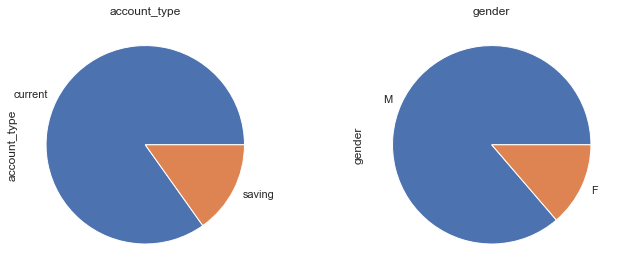

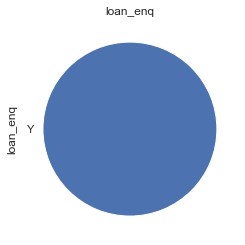

In [306]:
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='pie')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='pie')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='pie')
                plt.title(categorical_columns[i])
        
           
plot = plot_categorical_columns(df)

In [305]:
Most of the customers are having current account
Majority of the customers are male
Majority of the customer did not enquire for loan

Text(0, 0.5, '')

Text(0.5, 0, 'account_type')

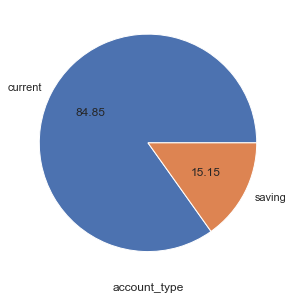

In [311]:
df['account_type'].value_counts().plot.pie(figsize=(5,5),autopct='%.2f')
plt.ylabel("")
plt.xlabel('account_type')

Text(0, 0.5, '')

Text(0.5, 0, 'gender')

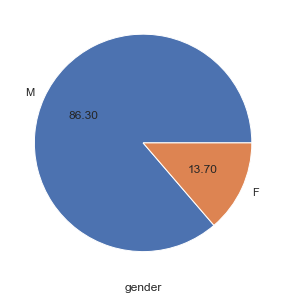

In [312]:
df['gender'].value_counts().plot.pie(figsize=(5,5),autopct='%.2f')
plt.ylabel("")
plt.xlabel('gender')